#Bussiness Understanding

Customer churn, or client turnover, is the loss of customers, commonly tracked by companies to minimize retention costs, which are lower than acquisition costs. Many businesses focus on voluntary churn, where customers actively choose to leave, rather than involuntary churn due to unavoidable circumstances. Predictive models identify at-risk customers, helping companies prioritize retention efforts on those most likely to leave, optimizing marketing and customer service strategies to reduce churn


#Importing libraries

In [ ]:

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import itertools
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff




# open csv

In [ ]:
df = pd.read_csv('churn-bigml-80.csv', sep=',', encoding='utf-8')
df_test = pd.read_csv('churn-bigml-20.csv', sep=',', encoding='utf-8')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#Data understanding

In [ ]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [ ]:
dataoveriew(df, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 2666

Number of features: 20

Features:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Missing values: 0

Unique values:
State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         15

In [ ]:
dataoveriew(df_test, 'Overiew of the training dataset')

Overiew of the training dataset:

Rows: 667

Number of features: 20

Features:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Missing values: 0

Unique values:
State                      51
Account length            179
Area code                   3
International plan          2
Voice mail plan             2
Number vmail messages      37
Total day minutes         562
Total day calls           100
Total day charge          562
Total eve minutes         557
Total eve calls            94
Total eve charge          528
Total night minutes       568
Total night calls          96
Total night charge        453
Total intl minutes        132
Total intl call

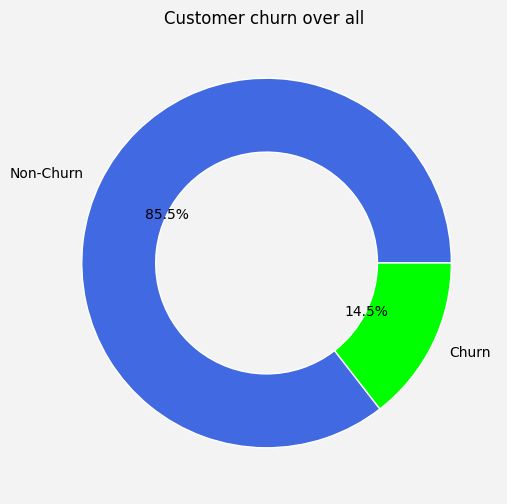

In [ ]:
import matplotlib.pyplot as plt
df_combined = pd.concat([df, df_test], axis=0, ignore_index=True)

# Calcul des valeurs de la variable Churn
churn_counts = df_combined['Churn'].value_counts()

# Création du graphique en donut
plt.figure(figsize=(6, 6))
plt.pie(
    churn_counts,
    labels=['Non-Churn', 'Churn'],
    autopct='%1.1f%%',
    colors=['royalblue', 'lime'],
    wedgeprops=dict(width=0.4, edgecolor='white')  # Trou central et bordures blanches
)

# Définir le titre et la couleur d'arrière-plan
plt.title("Customer churn over all ", backgroundcolor="#f3f3f3")
plt.gcf().set_facecolor("#f3f3f3")  # Couleur de fond du graphique

plt.show()


In [ ]:
# Sélectionner les variables numériques
numerical_cols = df_combined.select_dtypes(include=['number']).columns.tolist()

# Sélectionner les variables catégorielles
categorical_cols = df_combined.select_dtypes(include=['object', 'category','bool']).columns.tolist()

In [ ]:
#sns.pairplot(df, vars=numerical_cols, hue='Churn', palette='coolwarm')
#plt.suptitle("Pairplot des minutes d'appel avec l'attrition", y=1.02)
#plt.show()

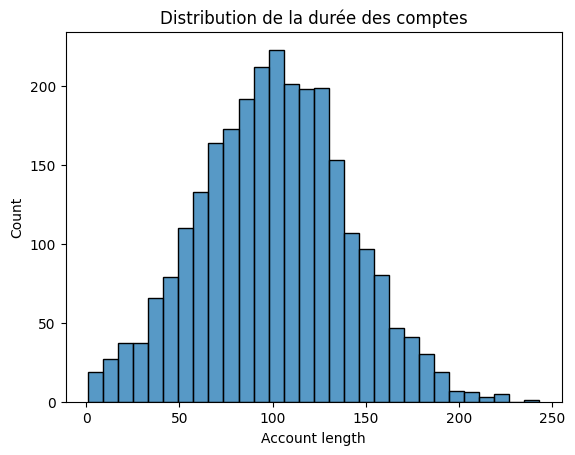

<ipython-input-90-0d5d95e7ddf3>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




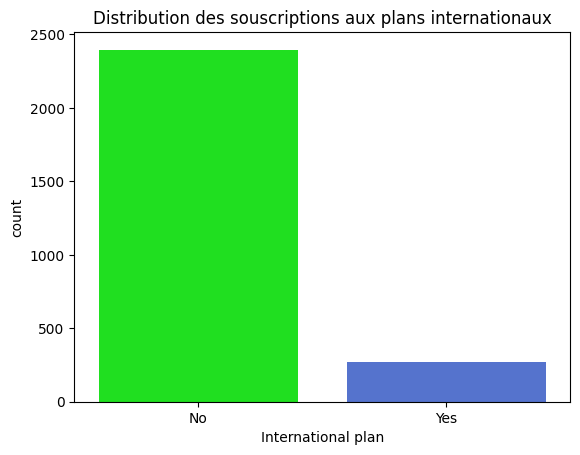

In [ ]:
# Distribution de l'âge des comptes
sns.histplot(df['Account length'], bins=30)
plt.title('Distribution de la durée des comptes')
plt.show()
sns.countplot(x='International plan', data=df, palette={'Yes': 'royalblue', 'No': 'lime'})
plt.title("Distribution des souscriptions aux plans internationaux")
plt.show()


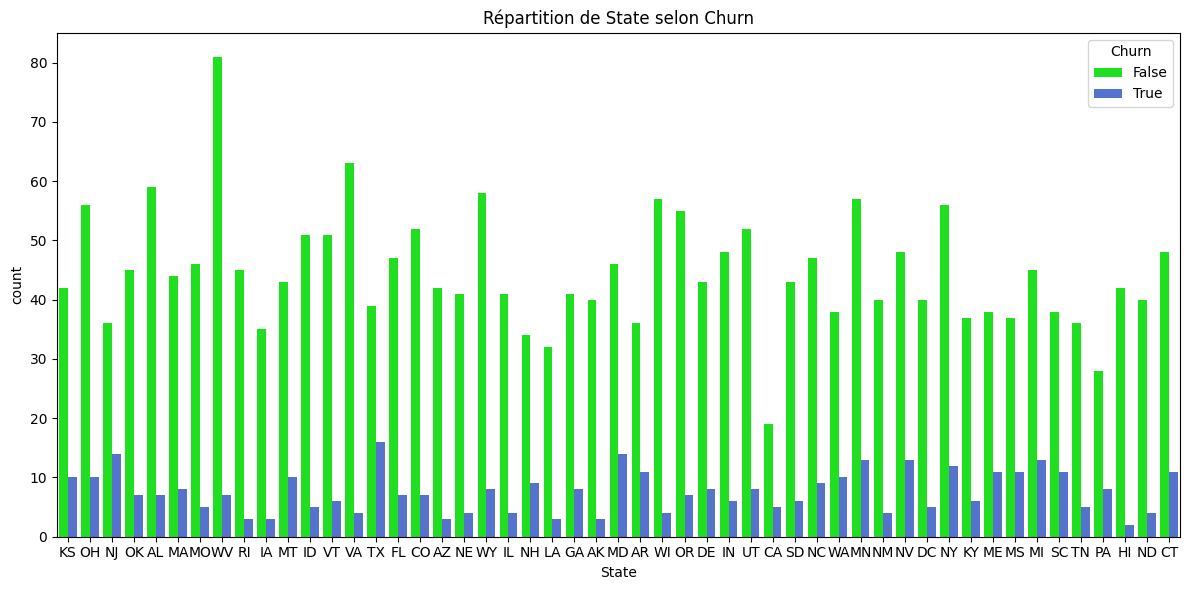

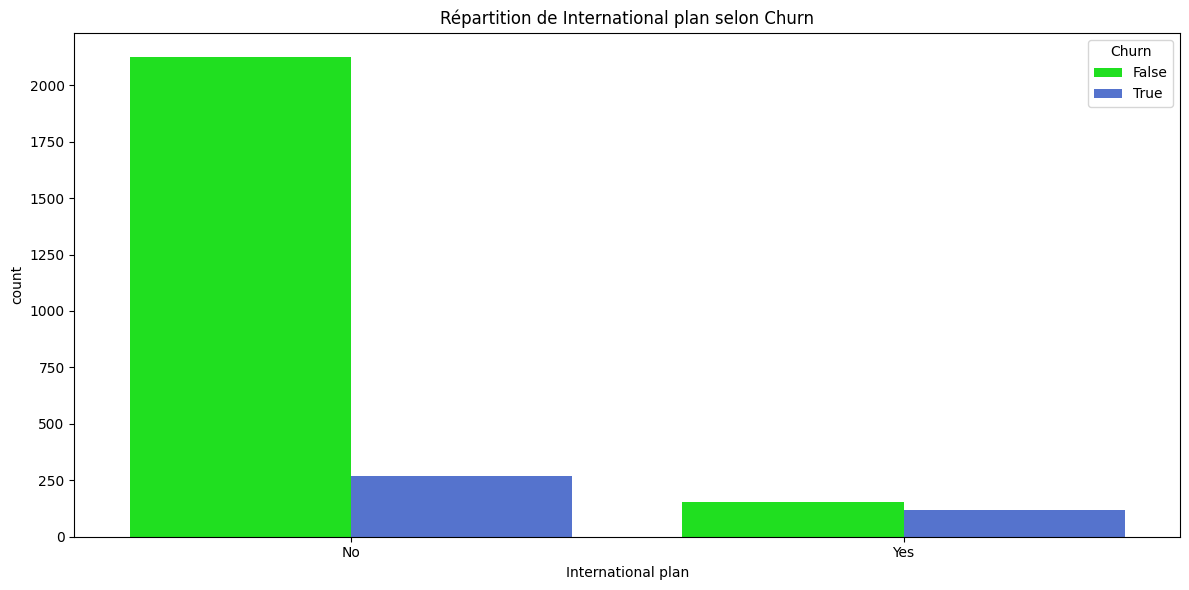

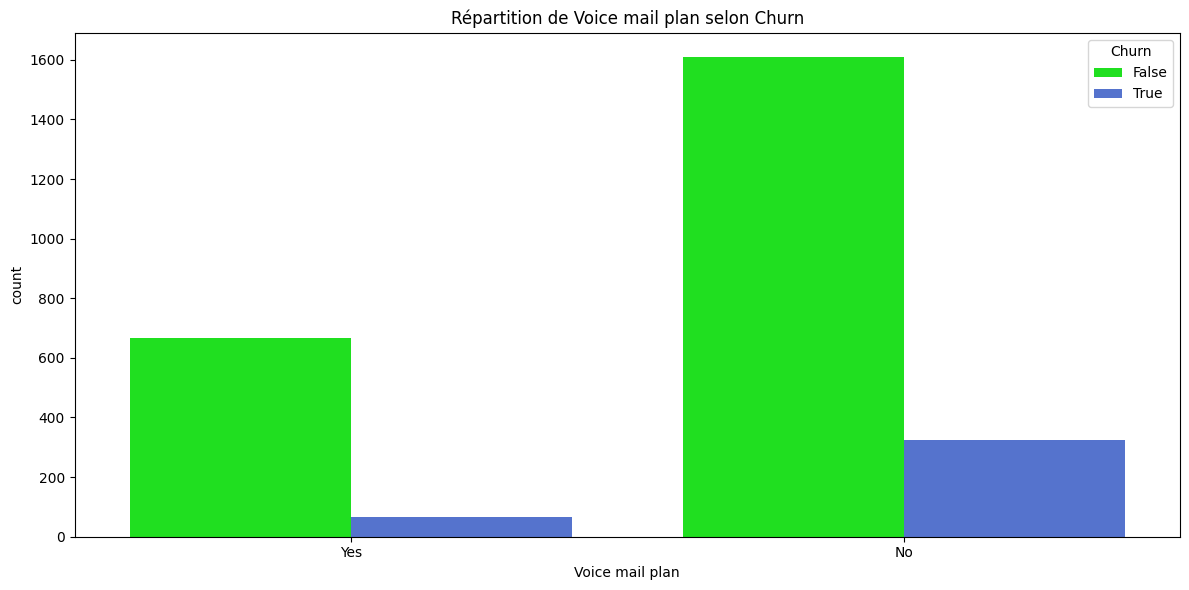

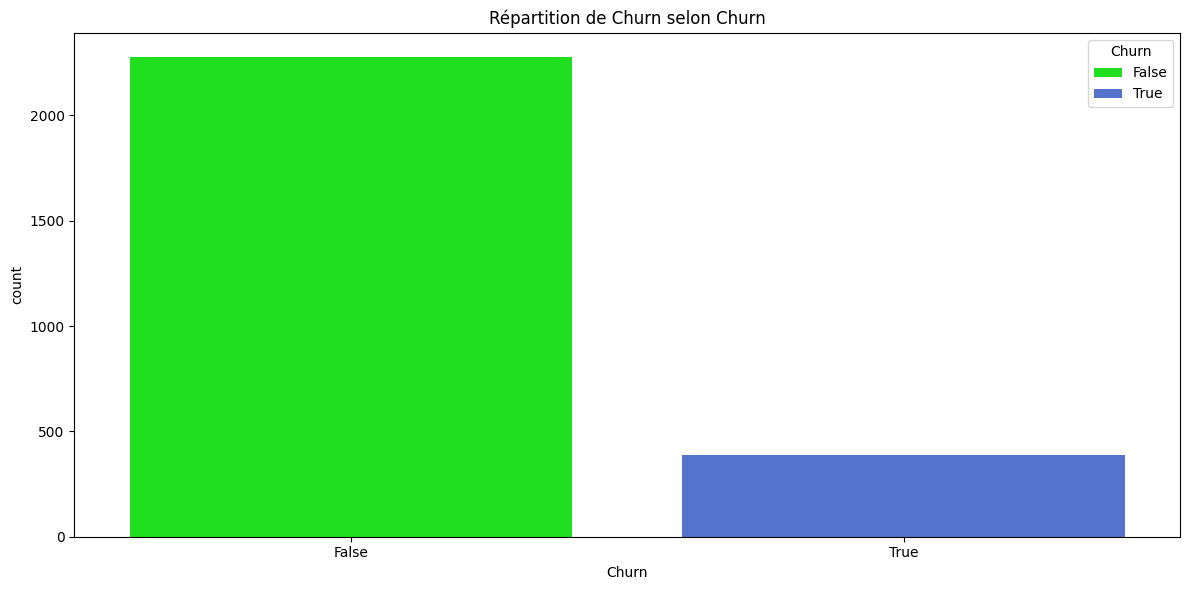

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
for column in categorical_columns:  # Exclure la dernière colonne
    plt.figure(figsize=(12, 6))  # Augmenter la taille pour plus de lisibilité
    ax = sns.countplot(x=column, hue='Churn', data=df, palette={True: 'royalblue', False: 'lime'})

    # Rotation des étiquettes pour l'axe x si trop de valeurs
    if column == 'state':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    plt.title(f"Répartition de {column} selon Churn")
    plt.tight_layout()  # Pour éviter le chevauchement des étiquettes
    plt.show()


If the ratio is greater than 1, it means that the group has a higher churn rate than the average, suggesting that this group is at a higher risk of leaving. If the ratio is less than 1, it means that the group has a lower churn rate than the average, suggesting that this group is less likely to leave

In [ ]:
global_mean = df['Churn'].mean()
from IPython.display import display
for feature in categorical_cols :
    df_group=df.groupby(feature).Churn.agg(['mean'])
    df_group['diff']=df_group['mean']-global_mean
    df_group['risk']=df_group['mean']/global_mean
    display(df_group)

,mean,diff,risk
State,,,
AK,0.069767,-0.075769,0.479381
AL,0.106061,-0.039476,0.728757
AR,0.234043,0.088506,1.608138
AZ,0.066667,-0.078870,0.458076
CA,0.208333,0.062797,1.431486
CO,0.118644,-0.026892,0.815219
CT,0.186441,0.040904,1.281059
DC,0.111111,-0.034425,0.763459
DE,0.156863,0.011326,1.077825


,mean,diff,risk
International plan,,,
No,0.112688,-0.032849,0.774293
Yes,0.437037,0.291501,3.002940


,mean,diff,risk
Voice mail plan,,,
No,0.167098,0.021561,1.148151
Yes,0.088677,-0.056860,0.609309


,mean,diff,risk
Churn,,,
False,0.0,-0.145536,0.000000
True,1.0,0.854464,6.871134


<ipython-input-93-6e4f566d5da7>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-93-6e4f566d5da7>:11: UserWarning:


The palette list has fewer values (2) than needed (51) and will cycle, which may produce an uninterpretable plot.

<ipython-input-93-6e4f566d5da7>:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



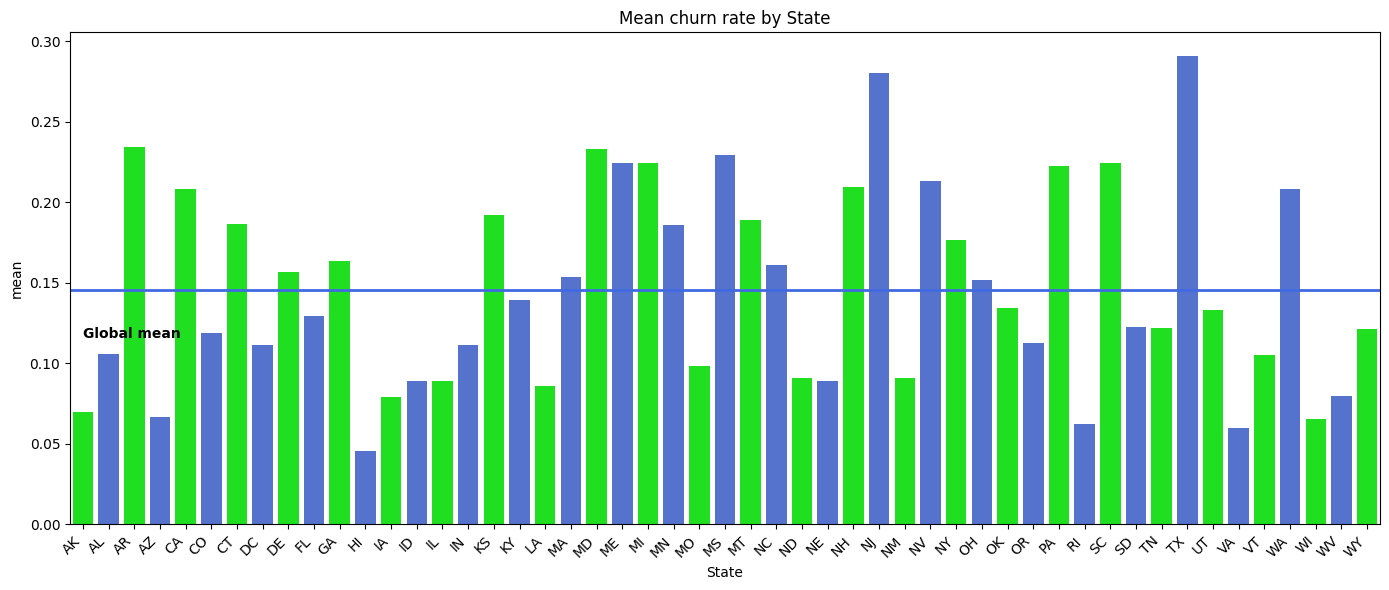

<ipython-input-93-6e4f566d5da7>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-93-6e4f566d5da7>:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



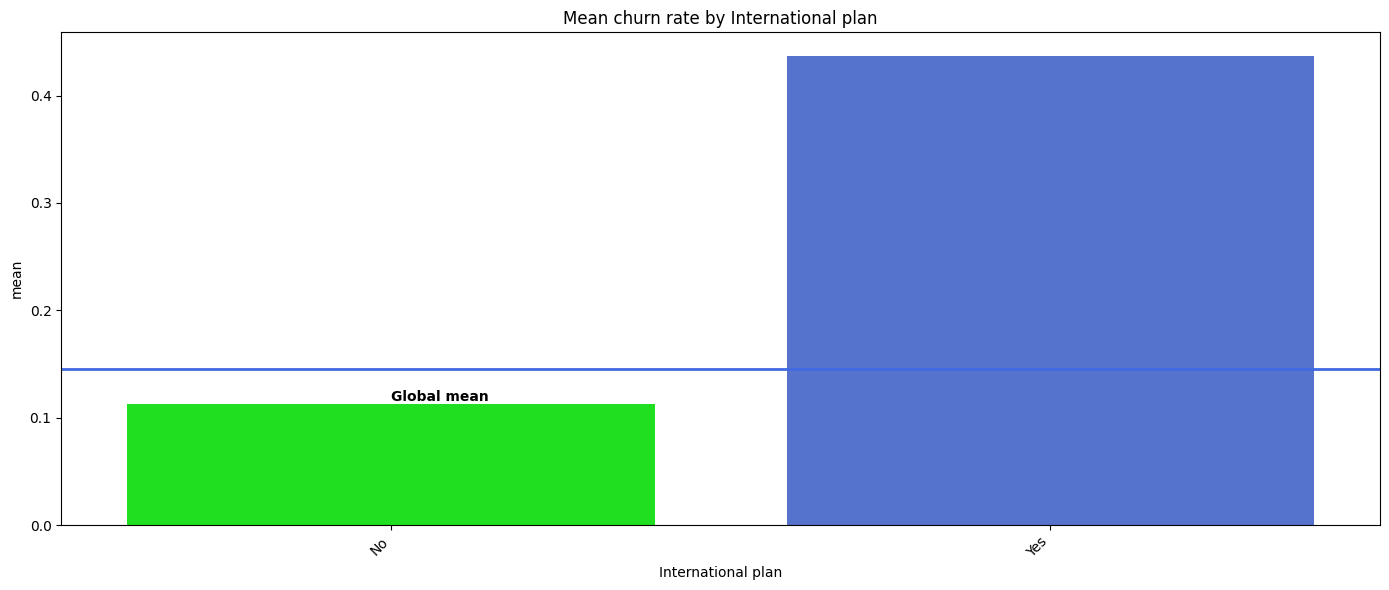

<ipython-input-93-6e4f566d5da7>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-93-6e4f566d5da7>:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



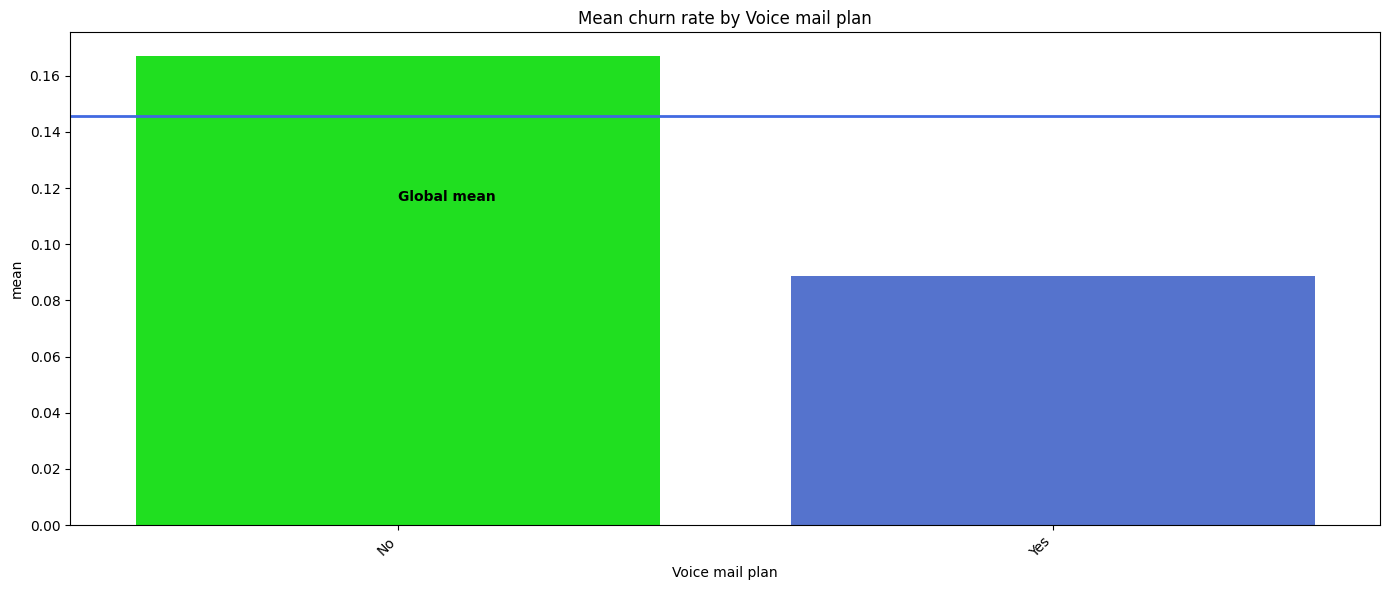

<ipython-input-93-6e4f566d5da7>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-93-6e4f566d5da7>:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



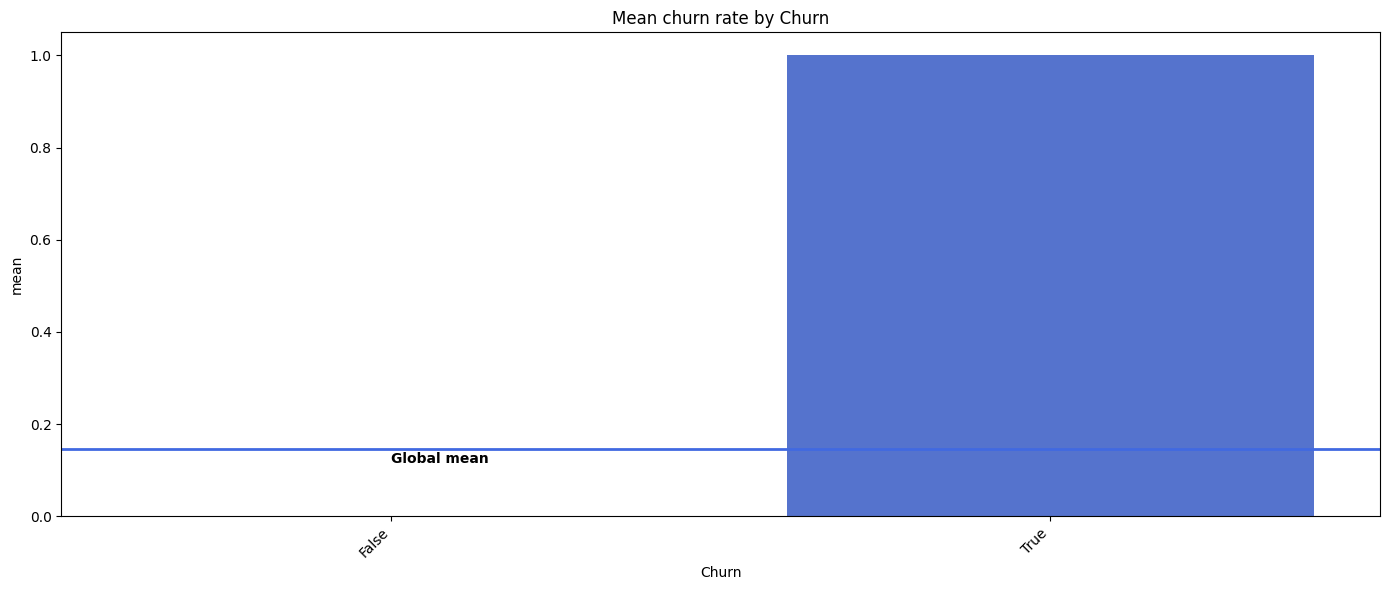

In [ ]:
for feature in categorical_cols:
    # Calcul des moyennes pour chaque catégorie
    df_group = df.groupby(feature).Churn.agg(['mean']).reset_index()

    # Limiter les catégories à afficher pour les colonnes contenant de nombreuses valeurs
    if feature == 'state':
        # Affiche seulement les 10 premières valeurs pour éviter l'encombrement
        df_group = df_group.nlargest(10, 'mean')  # Utiliser les top 10 catégories par moyenne de churn

    plt.figure(figsize=(14, 6))  # Agrandir le graphique pour plus de lisibilité
    graph = sns.barplot(x=feature, y='mean', data=df_group, palette=['lime', 'royalblue'])

    # Ligne pour la moyenne globale (bleu)
    graph.axhline(global_mean, linewidth=2, color='royalblue')
    plt.text(0, global_mean - 0.03, "Global mean", color='black', weight='semibold')

    # Rotation des étiquettes pour l'axe x si nécessaire
    graph.set_xticklabels(graph.get_xticklabels(), rotation=45, ha="right")

    plt.title(f"Mean churn rate by {feature}")
    plt.tight_layout()  # Ajustement automatique des marges pour éviter le chevauchement
    plt.show()


#Data Preprocessing

Correlated variables

<ipython-input-94-b8193bbcb258>:8: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



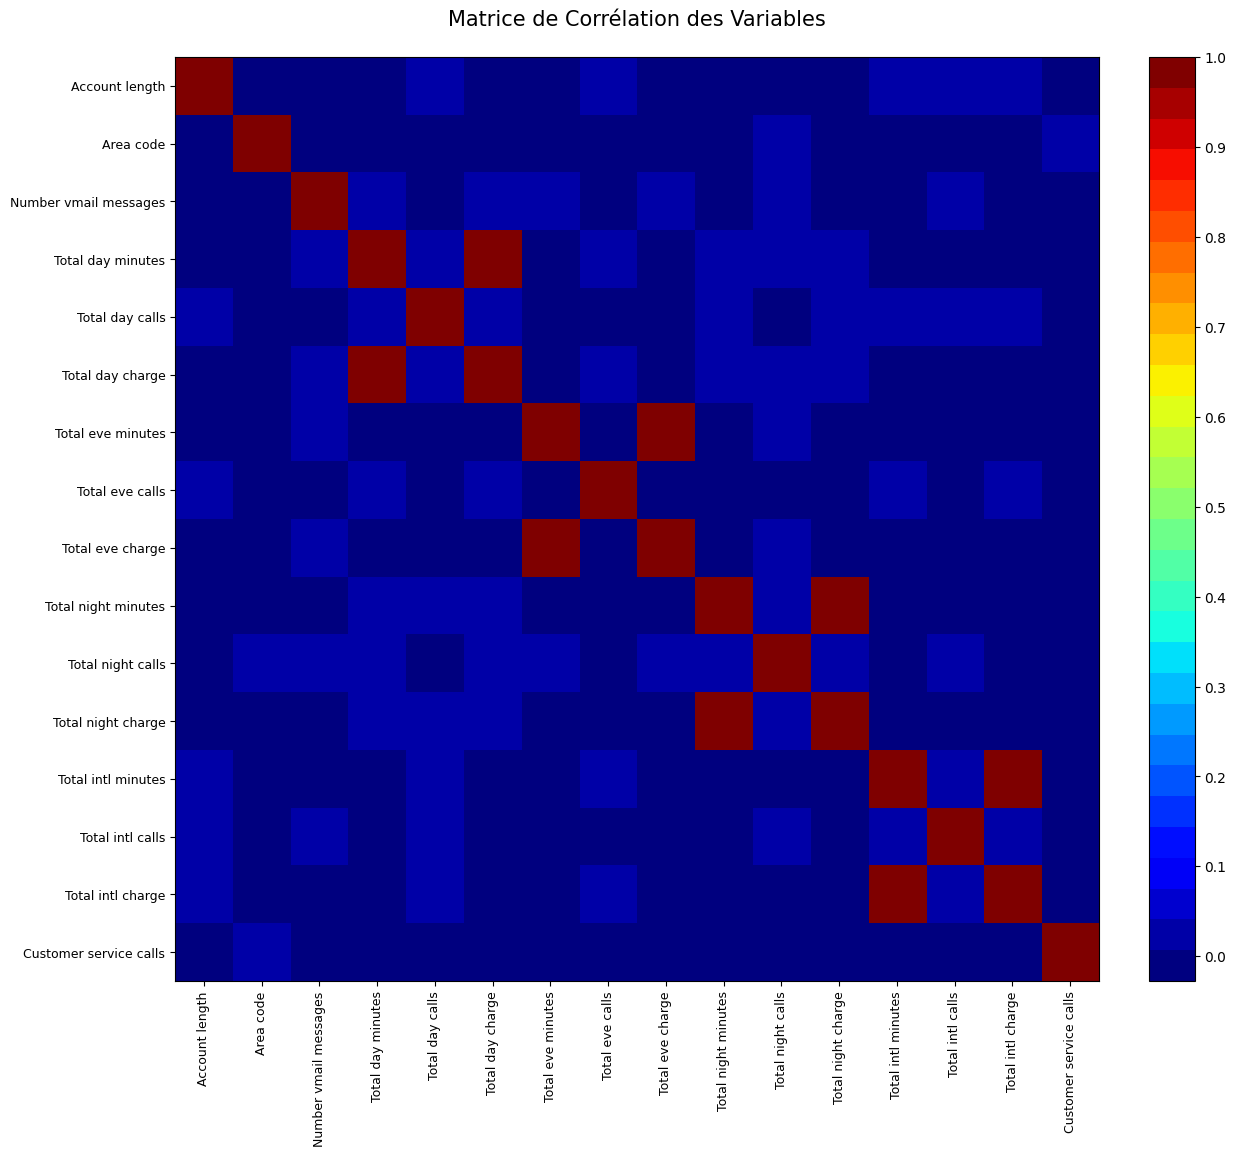

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm as cm

# Définir la fonction pour afficher la matrice de corrélation
def correlation_matrix(df):
    fig, ax = plt.subplots(figsize=(16, 12))
    cmap = cm.get_cmap('jet', 30)

    # Calculer la matrice de corrélation et créer l'image
    cax = ax.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax.grid(False)

    # Ajouter des étiquettes et titre
    plt.title('Matrice de Corrélation des Variables\n', fontsize=15)
    labels = df.columns
    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels, fontsize=9, rotation=90)
    ax.set_yticklabels(labels, fontsize=9)

    # Ajouter la barre de couleur avec des valeurs personnalisées
    fig.colorbar(cax, ticks=[0.1 * i for i in range(-10, 11)], fraction=0.046, pad=0.04)

    plt.show()

# Appel de la fonction sur votre DataFrame
correlation_matrix(df[numerical_cols])


In [ ]:
import pandas as pd

# Sélection des variables caractéristiques
data_characteristics = df[numerical_cols]

# Calcul de la matrice de corrélation
correlation_matrix = data_characteristics.corr()

# Limiter l'affichage des valeurs à 2 décimales pour une meilleure lisibilité
correlation_matrix_rounded = correlation_matrix.round(2)




In [ ]:
# Définir un seuil de corrélation pour les corrélations fortes
correlation_threshold = 0.8

# Sélectionner les paires de variables avec une corrélation forte, sans inclure les auto-corrélations (corrélations de 1)
strong_correlations = correlation_matrix[(correlation_matrix.abs() > correlation_threshold) & (correlation_matrix.abs() < 1.0)]

# Transformer la matrice en un format de tableau pour afficher les paires de variables
strong_corr_pairs = strong_correlations.stack().reset_index()
strong_corr_pairs.columns = ["Variable 1", "Variable 2", "Correlation"]
strong_corr_pairs.sort_values(by="Correlation", ascending=False, inplace=True)

# Afficher les paires de variables fortement corrélées
print(strong_corr_pairs)

            Variable 1           Variable 2  Correlation
0    Total day minutes     Total day charge     1.000000
1     Total day charge    Total day minutes     1.000000
2    Total eve minutes     Total eve charge     1.000000
3     Total eve charge    Total eve minutes     1.000000
4  Total night minutes   Total night charge     0.999999
5   Total night charge  Total night minutes     0.999999
6   Total intl minutes    Total intl charge     0.999993
7    Total intl charge   Total intl minutes     0.999993


In [ ]:
dff=df.copy()
dff_test=df_test.copy()
dff.drop(['Total day minutes', 'Total eve minutes','Total night minutes','Total intl minutes'], axis=1, inplace=True)
dff_test.drop(['Total day minutes', 'Total eve minutes','Total night minutes','Total intl minutes'], axis=1, inplace=True)


In [ ]:
columns_to_remove = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']
numerical_cols = [col for col in numerical_cols if col not in columns_to_remove]

# Afficher les colonnes restantes
print(numerical_cols)
print(len(numerical_cols))

['Account length', 'Area code', 'Number vmail messages', 'Total day calls', 'Total day charge', 'Total eve calls', 'Total eve charge', 'Total night calls', 'Total night charge', 'Total intl calls', 'Total intl charge', 'Customer service calls']
12


outliers

In [ ]:
def detect_outliers_iqr_specific(data, column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]

    return outliers


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def afficher_valeurs_aberrantes(data, colonne):
    valeurs_aberrantes = detect_outliers_iqr_specific(data, colonne)

    total_valeurs = len(data[colonne])
    total_aberrantes = len(valeurs_aberrantes)
    pourcentage_aberrantes = (total_aberrantes / total_valeurs) * 100

    bleu_gras = "\033[1m\033[94m"
    reinitialiser_format = "\033[0m"

    print(f"{bleu_gras}Caractéristique : {reinitialiser_format}{colonne}")
    print(f"{bleu_gras}Nombre total de valeurs aberrantes : {reinitialiser_format}{total_aberrantes}")
    print(f"{bleu_gras}Pourcentage de valeurs aberrantes : {reinitialiser_format}{pourcentage_aberrantes:.2f}%")
    print(f"{bleu_gras}Valeurs aberrantes :{reinitialiser_format}\n{valeurs_aberrantes.tolist()}")

    plt.figure(figsize=(18, 6))

    # First plot: Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(data=data, x=colonne, color="skyblue")
    plt.title(f"Boxplot des valeurs pour {colonne}")
    plt.xlabel(colonne)

    # Second plot: Histogram
    plt.subplot(1, 3, 2)
    sns.histplot(data[colonne], bins=20, kde=True, color="lightcoral")
    plt.title(f"Histogramme des valeurs pour {colonne}")
    plt.xlabel(colonne)
    plt.ylabel("Fréquence")

    # Third plot: Scatter-Histogram-KDE combo
    plt.subplot(1, 3, 3)
    y = np.arange(len(data[colonne]))  # Creating an index sequence for y-axis

    # Plotting scatter, histogram, and KDE for 2D visualization
    sns.scatterplot(x=data[colonne], y=y, s=5, color=".15")
    sns.histplot(x=data[colonne], y=y, bins=50, pthresh=.1, cmap="mako")
    sns.kdeplot(x=data[colonne], y=y, levels=5, color="lightcoral", linewidths=1)

    plt.title(f"Scatter-Histogram-KDE Plot pour {colonne}")
    plt.xlabel(colonne)
    plt.ylabel("Index")

    plt.tight_layout()
    plt.show()


Account length

Caractéristique : Account length
Nombre total de valeurs aberrantes : 12
Pourcentage de valeurs aberrantes : 0.45%
Valeurs aberrantes :
[209, 224, 243, 210, 212, 225, 225, 224, 212, 210, 217, 221]


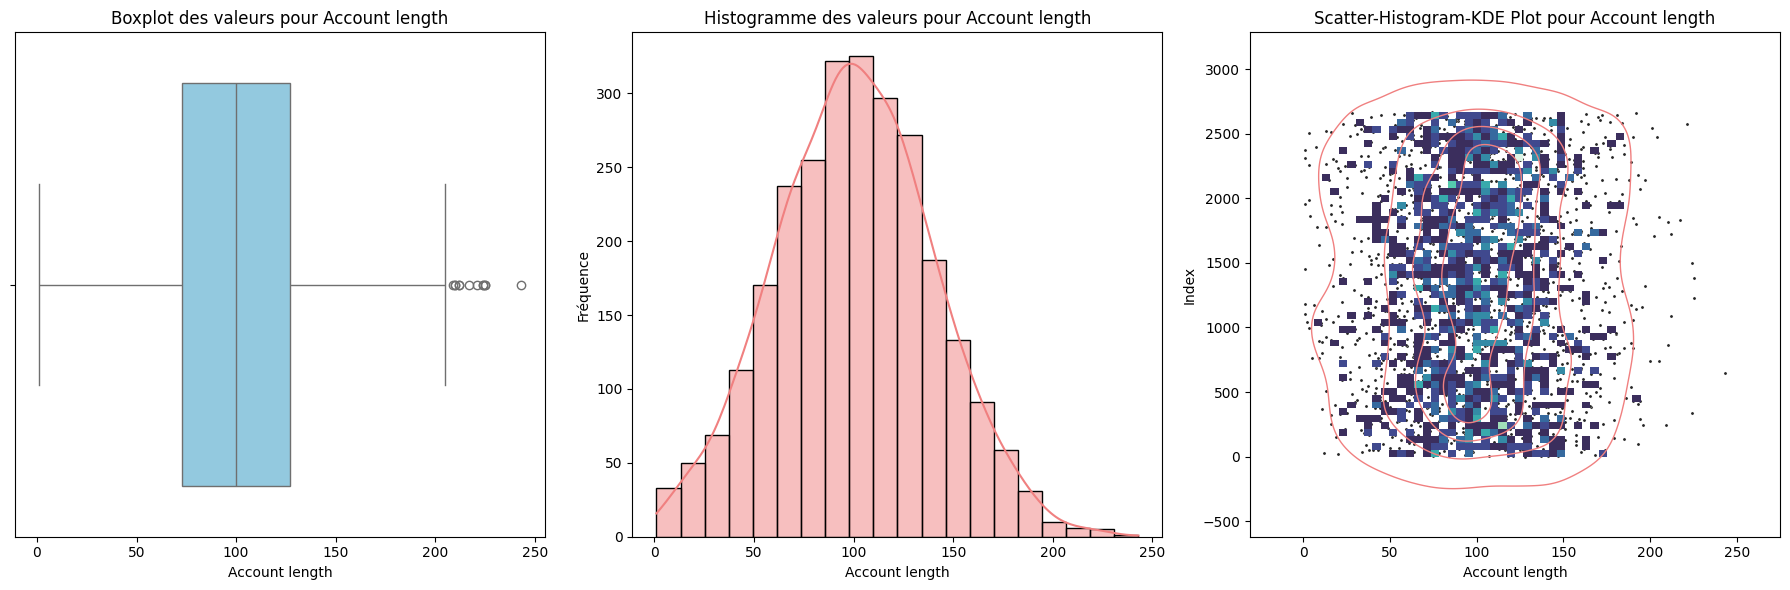

nbr du valeure negative 0
----------------------
Caractéristique : Area code
Nombre total de valeurs aberrantes : 0
Pourcentage de valeurs aberrantes : 0.00%
Valeurs aberrantes :
[]


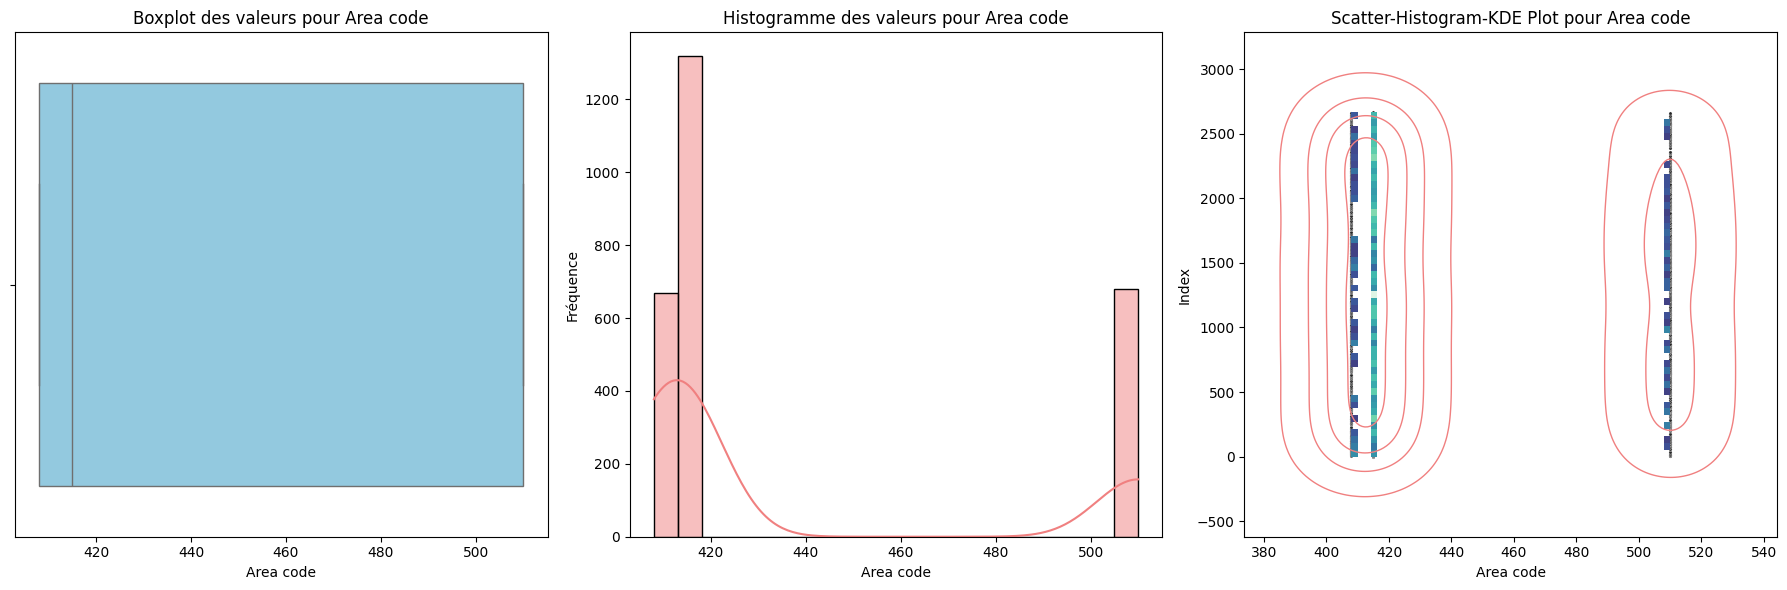

nbr du valeure negative 0
----------------------
Caractéristique : Number vmail messages
Nombre total de valeurs aberrantes : 2
Pourcentage de valeurs aberrantes : 0.08%
Valeurs aberrantes :
[50, 50]


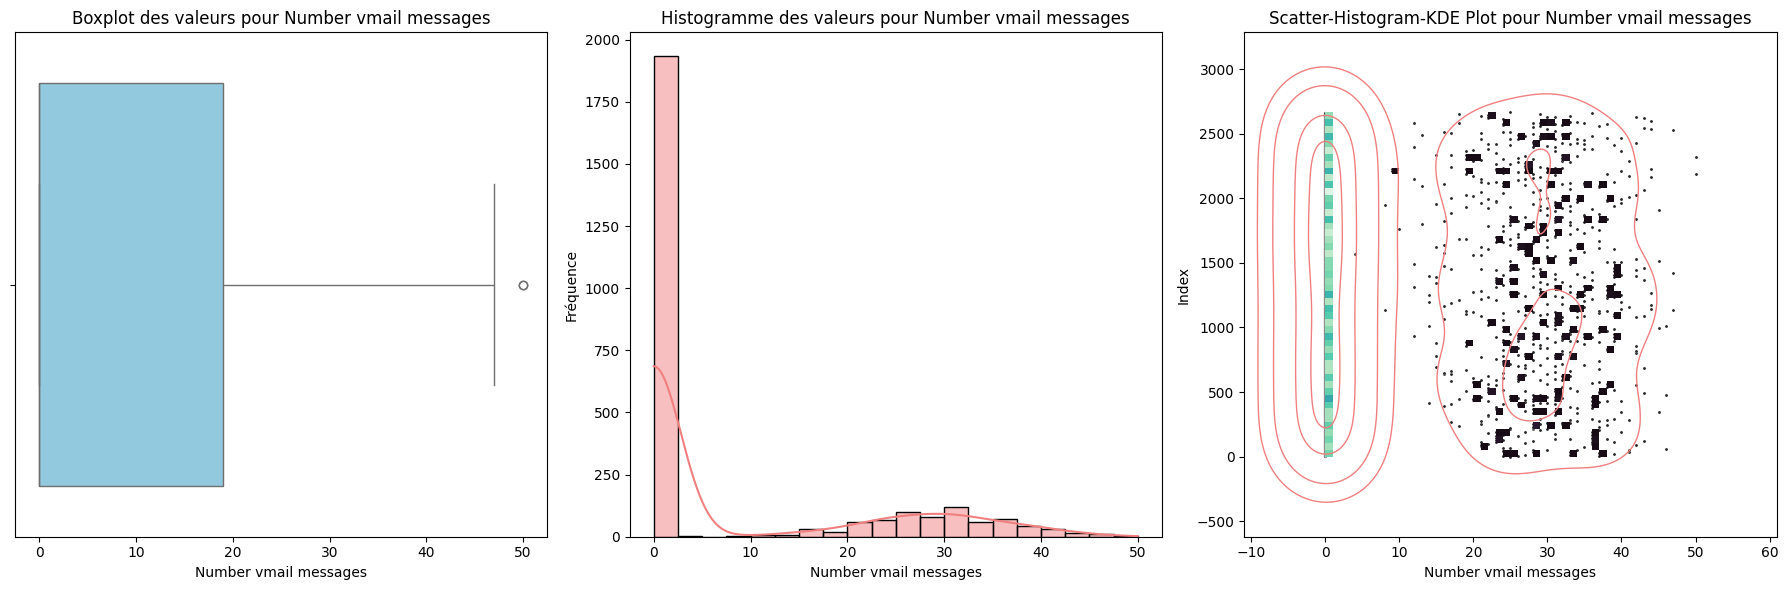

nbr du valeure negative 0
----------------------
Caractéristique : Total day calls
Nombre total de valeurs aberrantes : 18
Pourcentage de valeurs aberrantes : 0.68%
Valeurs aberrantes :
[158, 36, 40, 158, 42, 0, 45, 0, 45, 160, 156, 42, 158, 157, 45, 44, 44, 44]


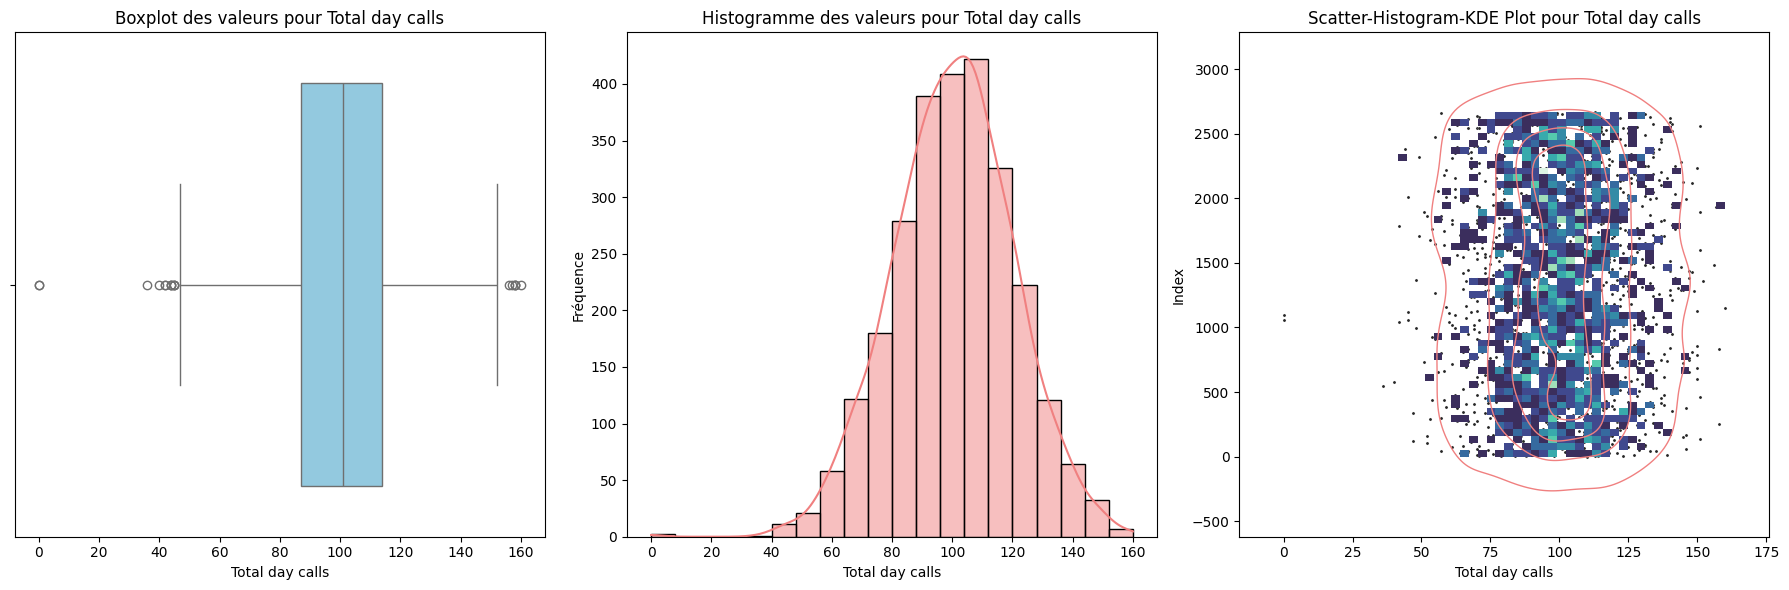

nbr du valeure negative 0
----------------------
Caractéristique : Total day charge
Nombre total de valeurs aberrantes : 21
Pourcentage de valeurs aberrantes : 0.79%
Valeurs aberrantes :
[57.36, 59.64, 57.04, 5.25, 5.78, 58.96, 2.13, 0.0, 0.0, 3.32, 56.07, 1.34, 55.78, 4.59, 2.99, 55.47, 58.7, 0.44, 1.33, 3.21, 5.08]


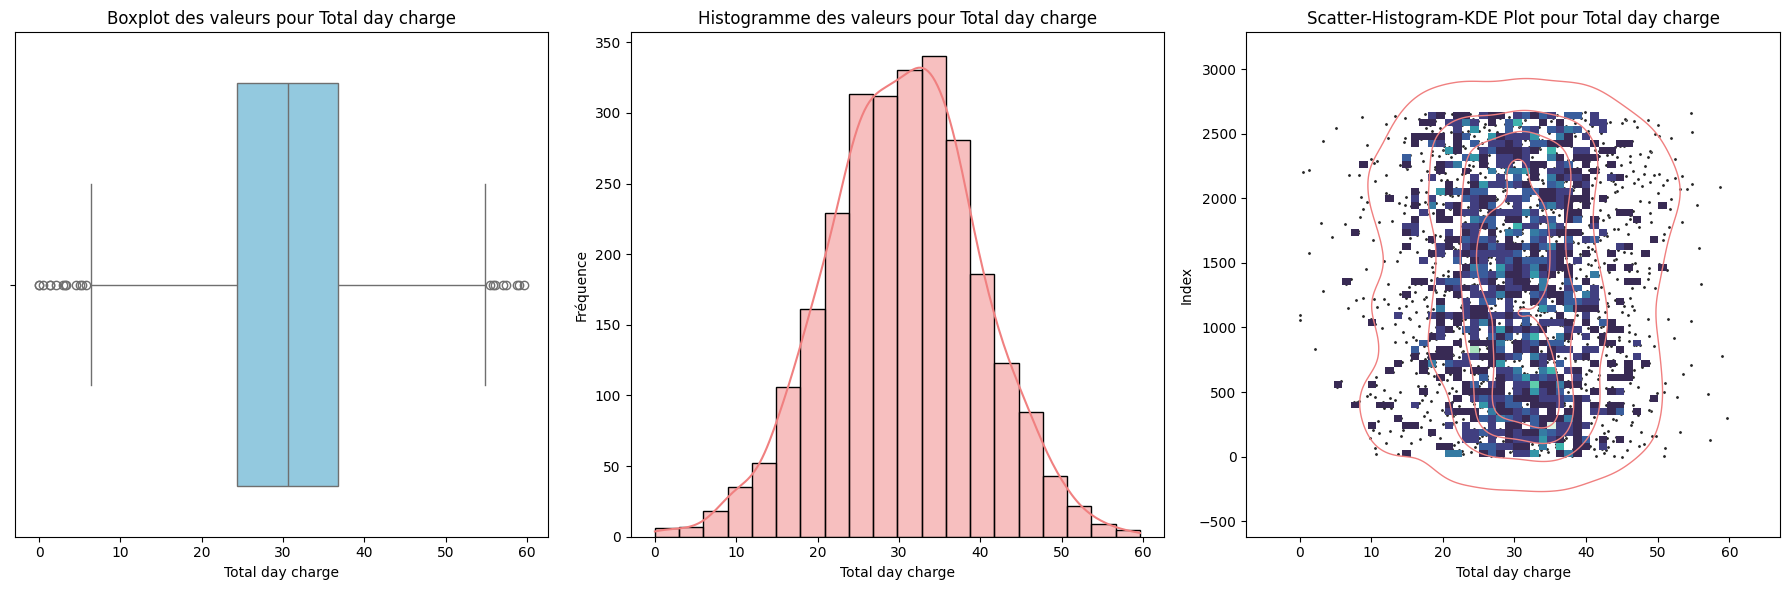

nbr du valeure negative 0
----------------------
Caractéristique : Total eve calls
Nombre total de valeurs aberrantes : 15
Pourcentage de valeurs aberrantes : 0.56%
Valeurs aberrantes :
[46, 42, 12, 157, 45, 36, 156, 46, 44, 155, 43, 0, 155, 159, 170]


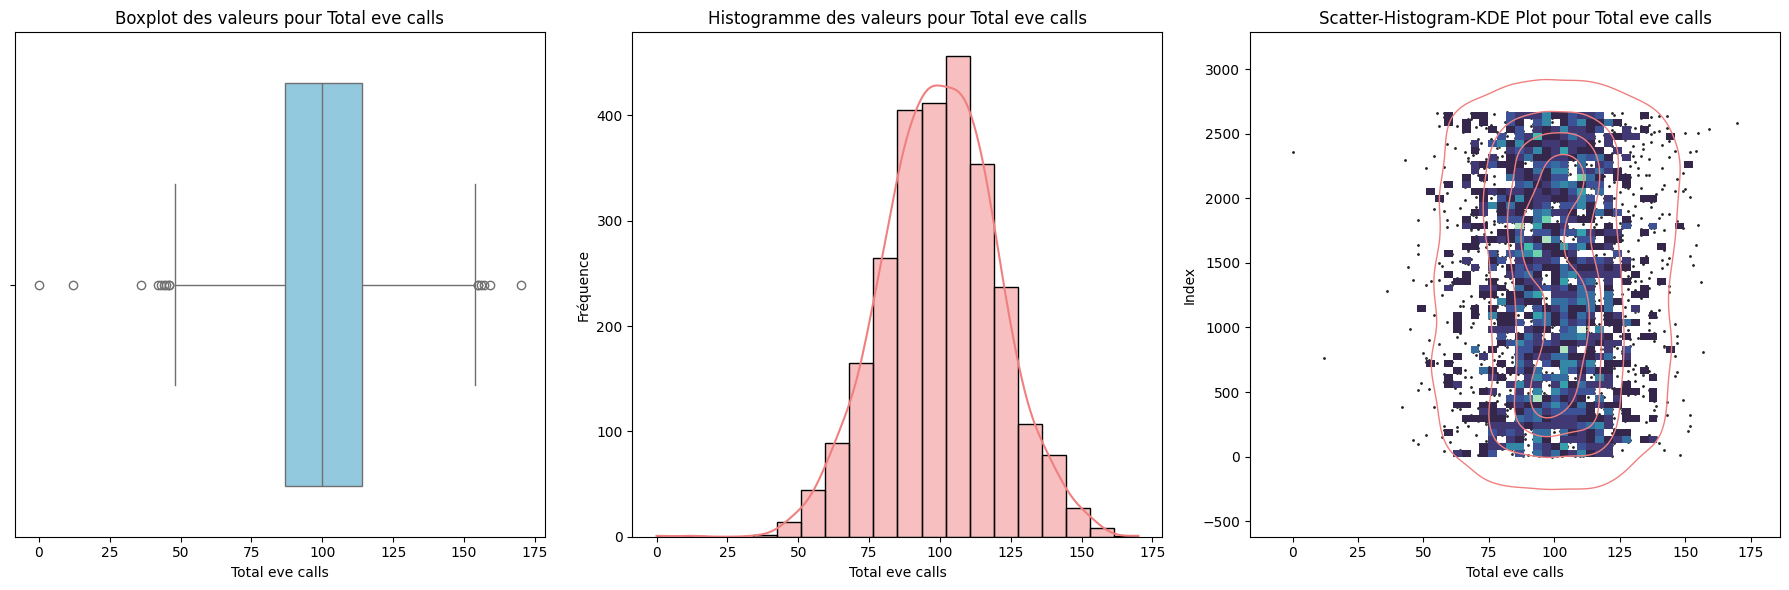

nbr du valeure negative 0
----------------------
Caractéristique : Total eve charge
Nombre total de valeurs aberrantes : 17
Pourcentage de valeurs aberrantes : 0.64%
Valeurs aberrantes :
[29.62, 2.65, 3.59, 29.52, 5.01, 3.73, 4.5, 3.61, 4.98, 4.76, 29.83, 4.18, 28.89, 30.11, 30.91, 0.0, 29.01]


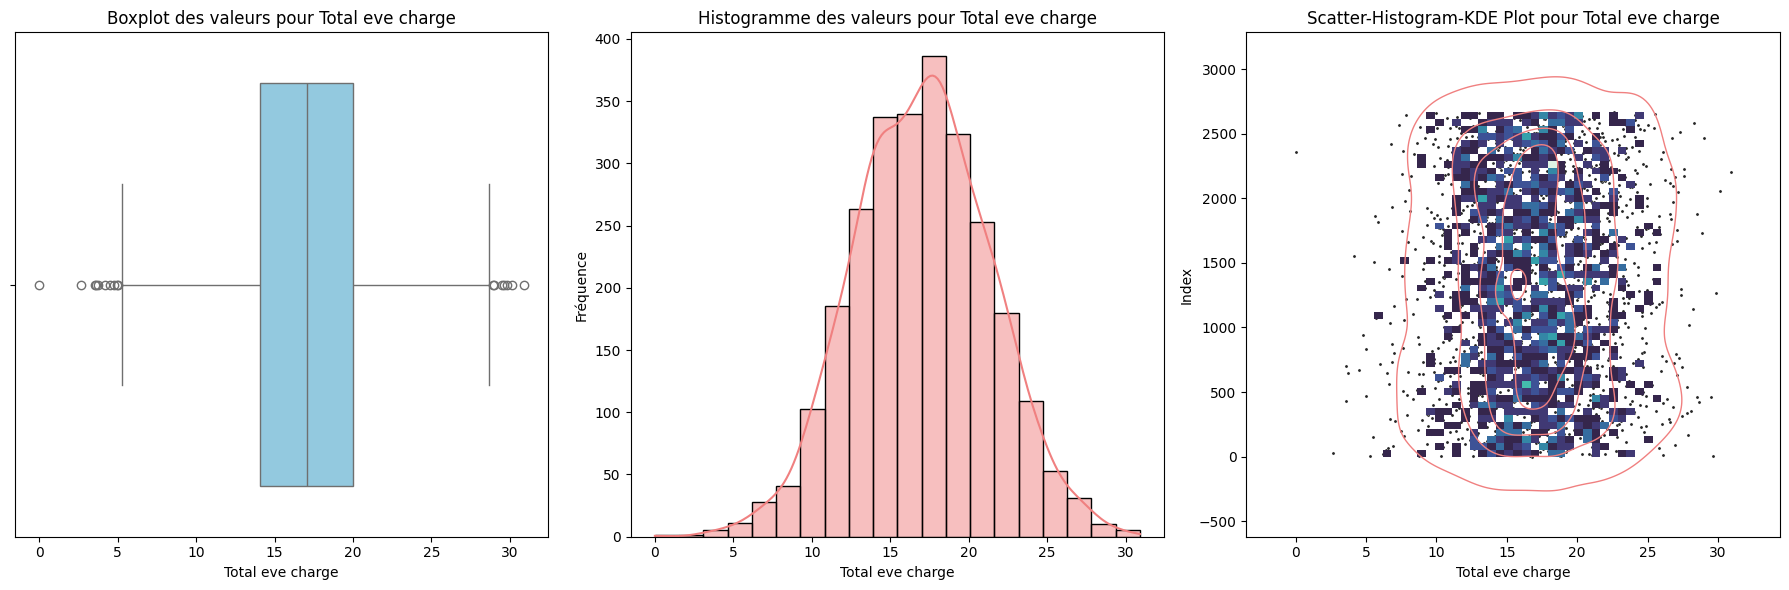

nbr du valeure negative 0
----------------------
Caractéristique : Total night calls
Nombre total de valeurs aberrantes : 19
Pourcentage de valeurs aberrantes : 0.71%
Valeurs aberrantes :
[46, 44, 42, 153, 154, 158, 157, 157, 154, 153, 166, 33, 155, 156, 38, 36, 156, 164, 153]


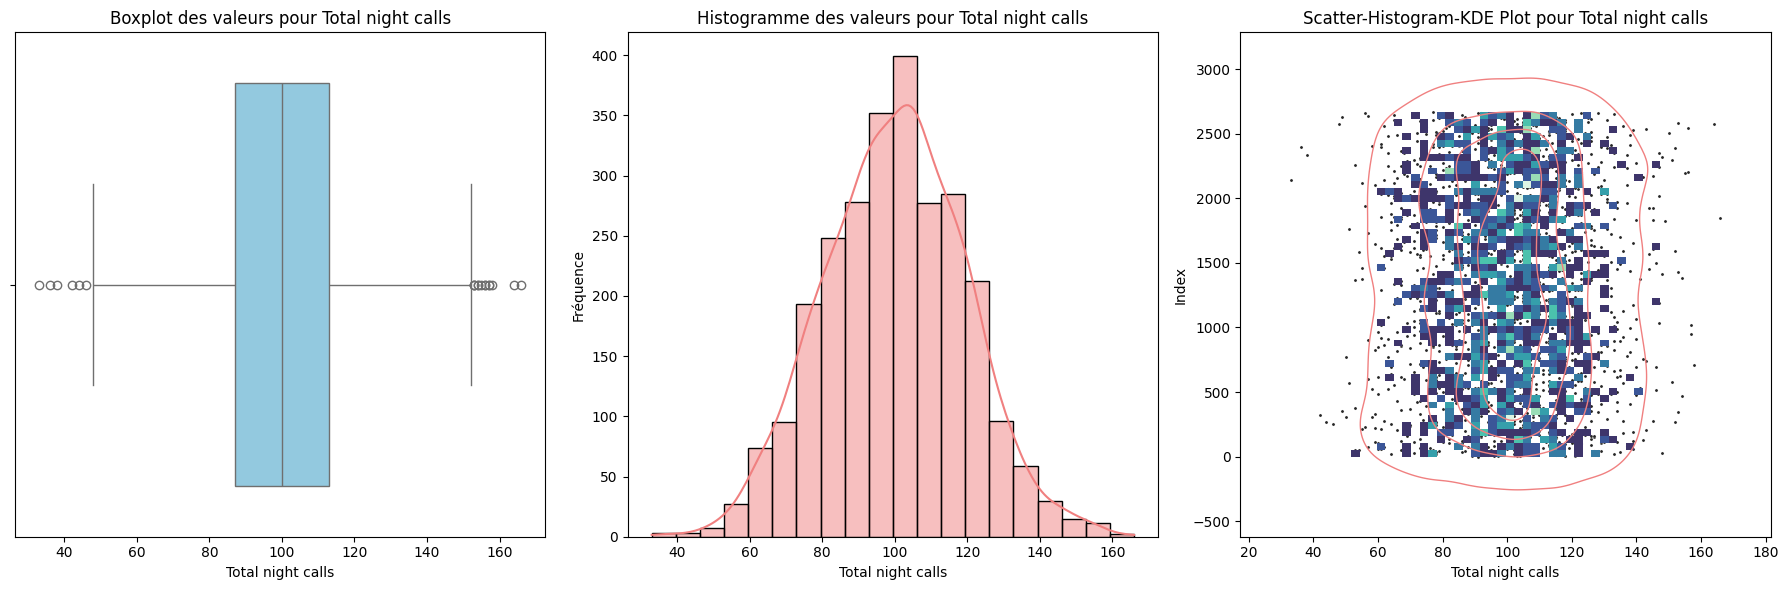

nbr du valeure negative 0
----------------------
Caractéristique : Total night charge
Nombre total de valeurs aberrantes : 22
Pourcentage de valeurs aberrantes : 0.83%
Valeurs aberrantes :
[2.59, 15.97, 15.71, 2.03, 15.43, 16.39, 2.45, 2.25, 1.97, 15.86, 17.19, 16.99, 2.55, 2.43, 15.49, 17.77, 15.76, 2.25, 2.4, 15.85, 16.42, 2.13]


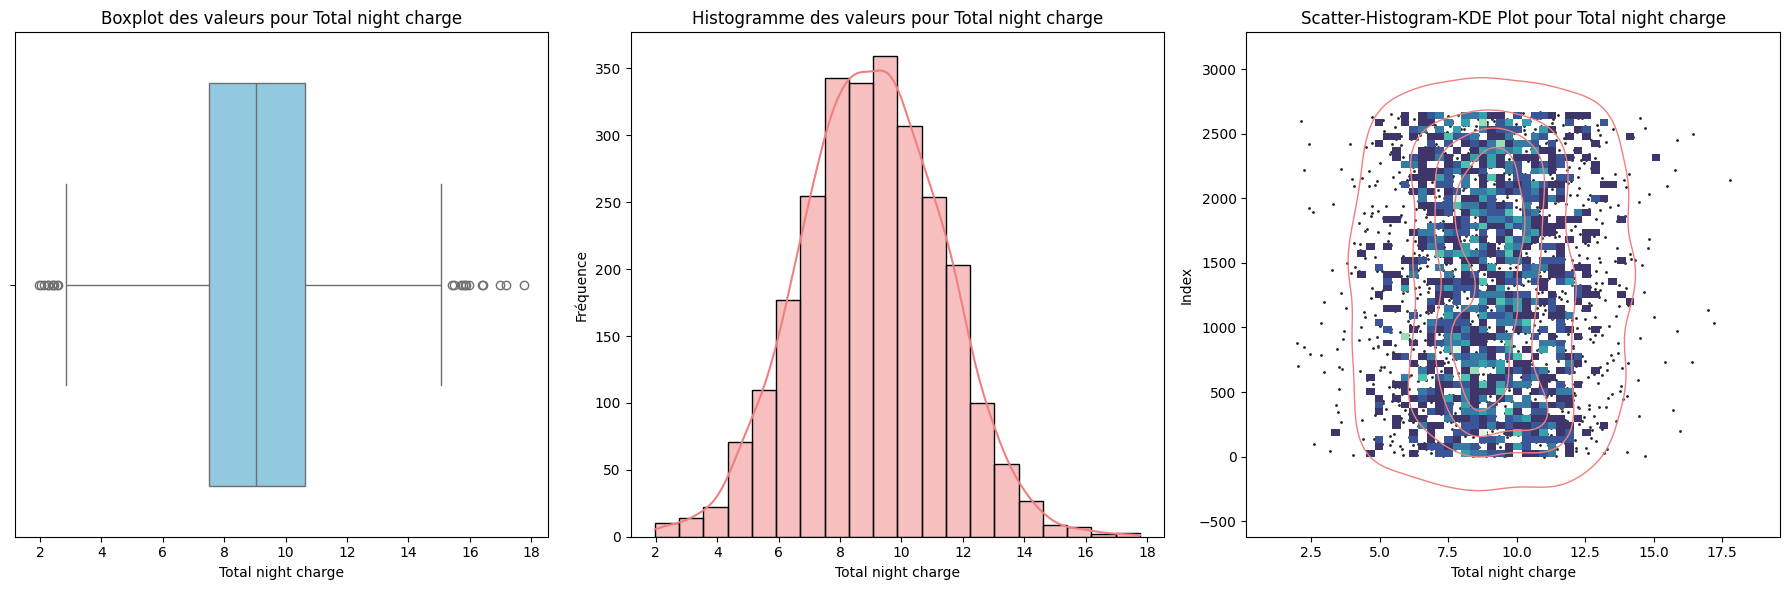

nbr du valeure negative 0
----------------------
Caractéristique : Total intl calls
Nombre total de valeurs aberrantes : 66
Pourcentage de valeurs aberrantes : 2.48%
Valeurs aberrantes :
[19, 15, 11, 12, 13, 11, 12, 11, 13, 12, 11, 11, 18, 11, 13, 12, 12, 13, 11, 11, 14, 13, 11, 13, 12, 11, 14, 15, 18, 13, 11, 14, 11, 14, 15, 12, 11, 16, 11, 11, 11, 11, 11, 14, 11, 12, 13, 11, 11, 16, 13, 13, 11, 15, 11, 12, 13, 12, 12, 12, 11, 13, 11, 13, 20, 17]


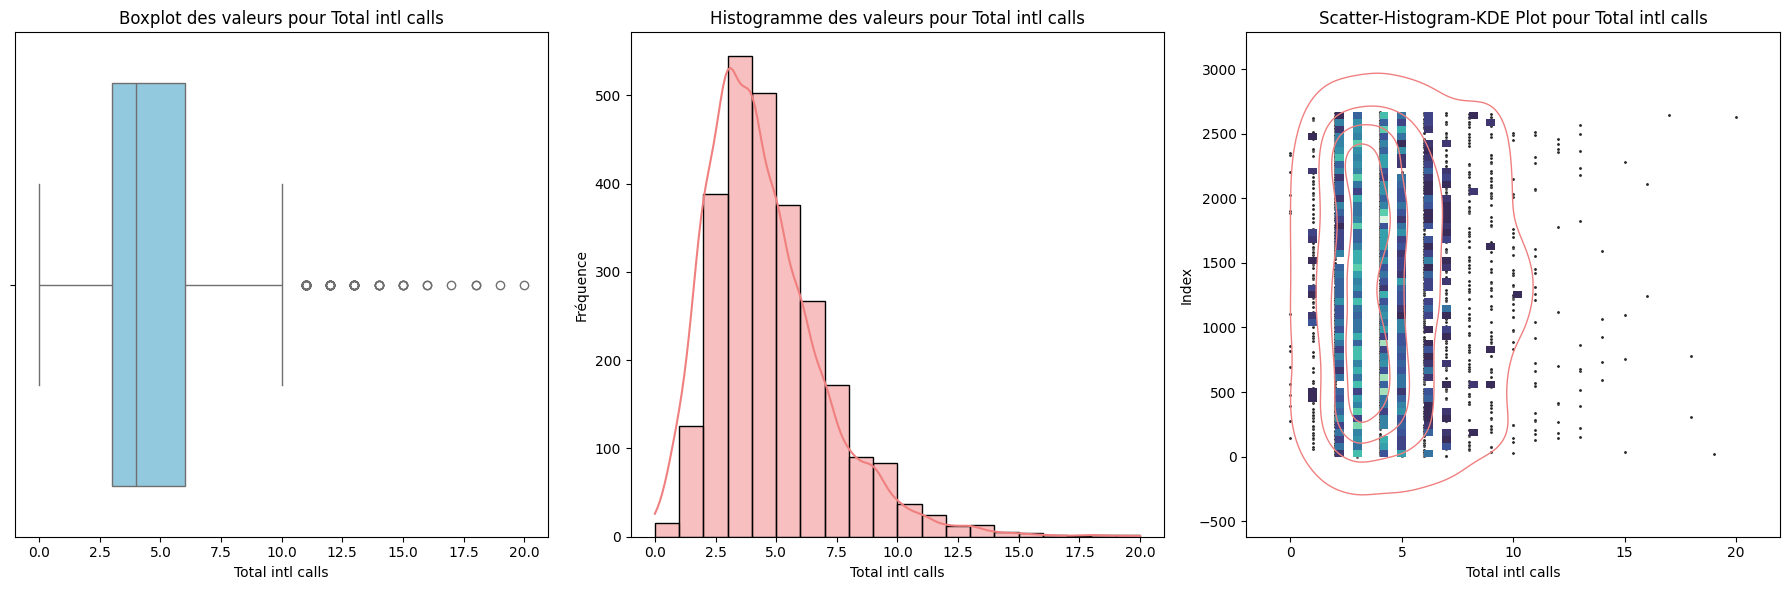

nbr du valeure negative 0
----------------------
Caractéristique : Total intl charge
Nombre total de valeurs aberrantes : 40
Pourcentage de valeurs aberrantes : 1.50%
Valeurs aberrantes :
[5.4, 0.0, 4.75, 5.1, 0.0, 4.86, 0.0, 4.73, 4.73, 4.91, 0.0, 0.0, 0.35, 0.0, 0.0, 0.0, 0.59, 0.0, 4.83, 4.97, 4.81, 0.78, 0.84, 4.75, 0.7, 0.0, 0.0, 4.91, 0.0, 4.86, 0.3, 0.0, 0.0, 0.0, 0.57, 0.78, 4.73, 0.65, 0.68, 4.81]


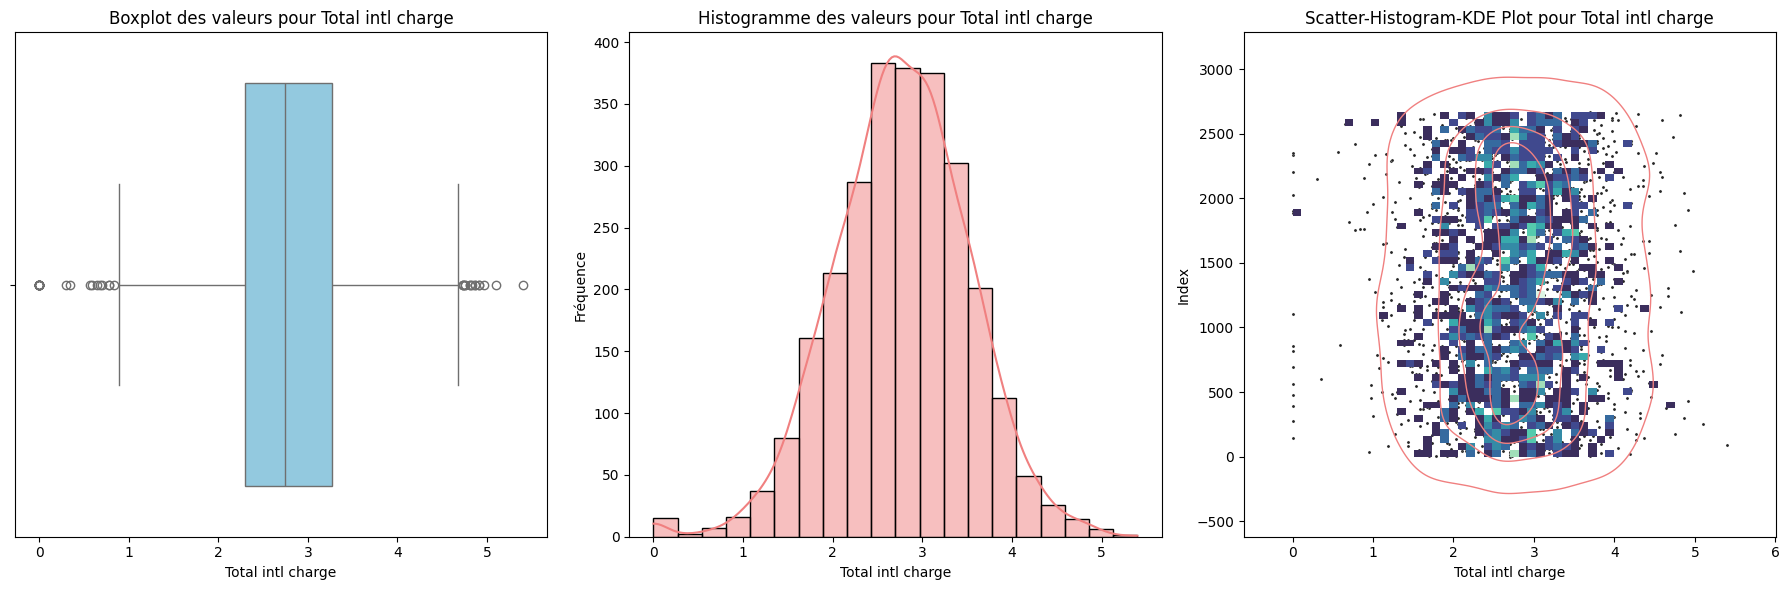

nbr du valeure negative 0
----------------------
Caractéristique : Customer service calls
Nombre total de valeurs aberrantes : 210
Pourcentage de valeurs aberrantes : 7.88%
Valeurs aberrantes :
[4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 4, 7, 9, 4, 4, 4, 4, 5, 4, 4, 5, 5, 6, 5, 4, 4, 5, 4, 7, 4, 6, 5, 4, 4, 6, 4, 4, 5, 4, 4, 5, 6, 5, 4, 4, 4, 4, 4, 5, 5, 4, 4, 6, 4, 5, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 6, 5, 7, 4, 4, 5, 4, 4, 4, 4, 5, 7, 4, 5, 7, 4, 4, 4, 8, 4, 4, 5, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 4, 4, 5, 5, 4, 6, 4, 4, 4, 9, 6, 4, 5, 5, 6, 4, 4, 4, 5, 5, 6, 4, 4, 4, 5, 4, 4, 4, 5, 4, 5, 6, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 5, 5, 6, 7, 5, 5, 4, 6, 4, 4, 4, 5, 6, 7, 4, 4, 5, 5, 4, 4, 5, 6, 5, 4, 4, 4, 4, 4, 4, 4, 4, 5]


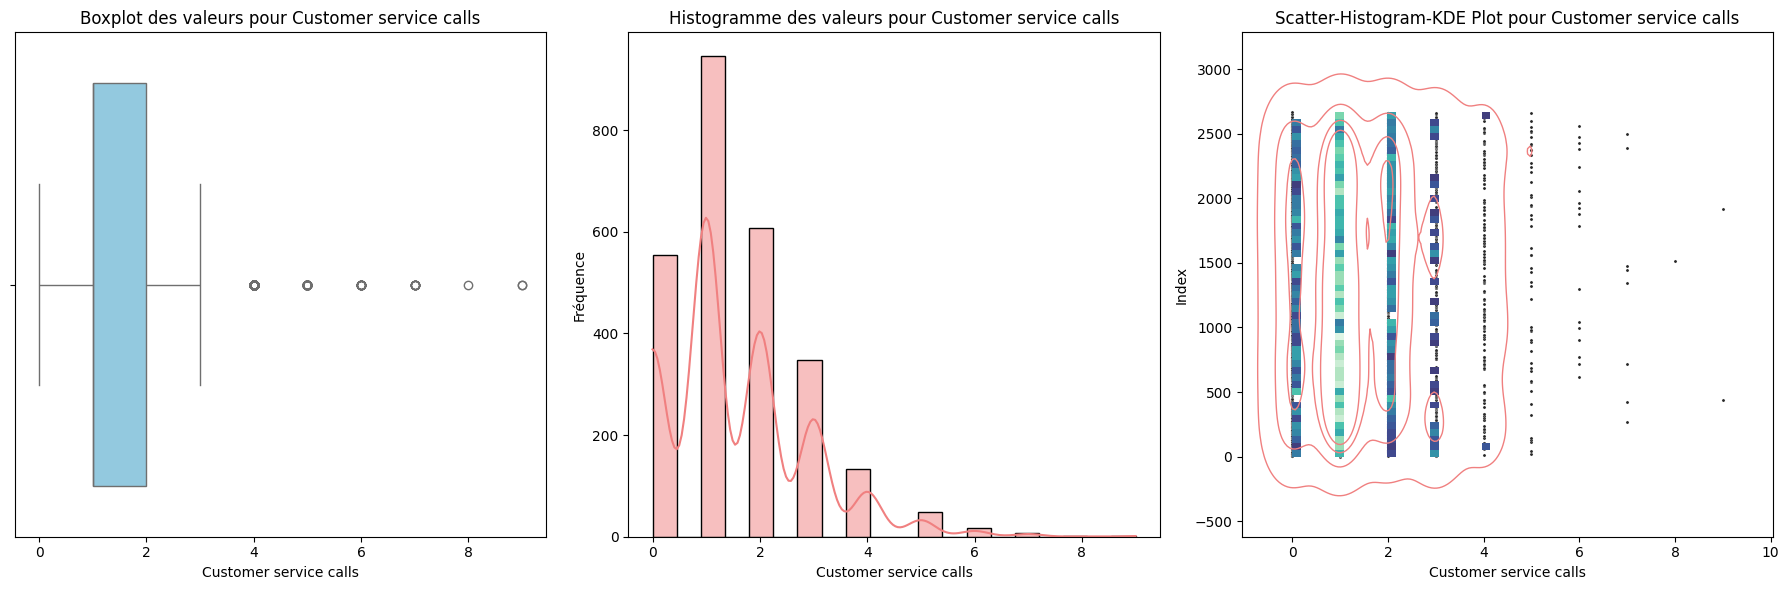

nbr du valeure negative 0
----------------------


In [ ]:
for c in numerical_cols:
    afficher_valeurs_aberrantes(dff, c)
    zero_value_count = (dff[c] < 0).sum()
    print("nbr du valeure negative",zero_value_count)
    print("----------------------")

We chose to keep all positive values as they represent critical cases

**Nan values**

train dataset

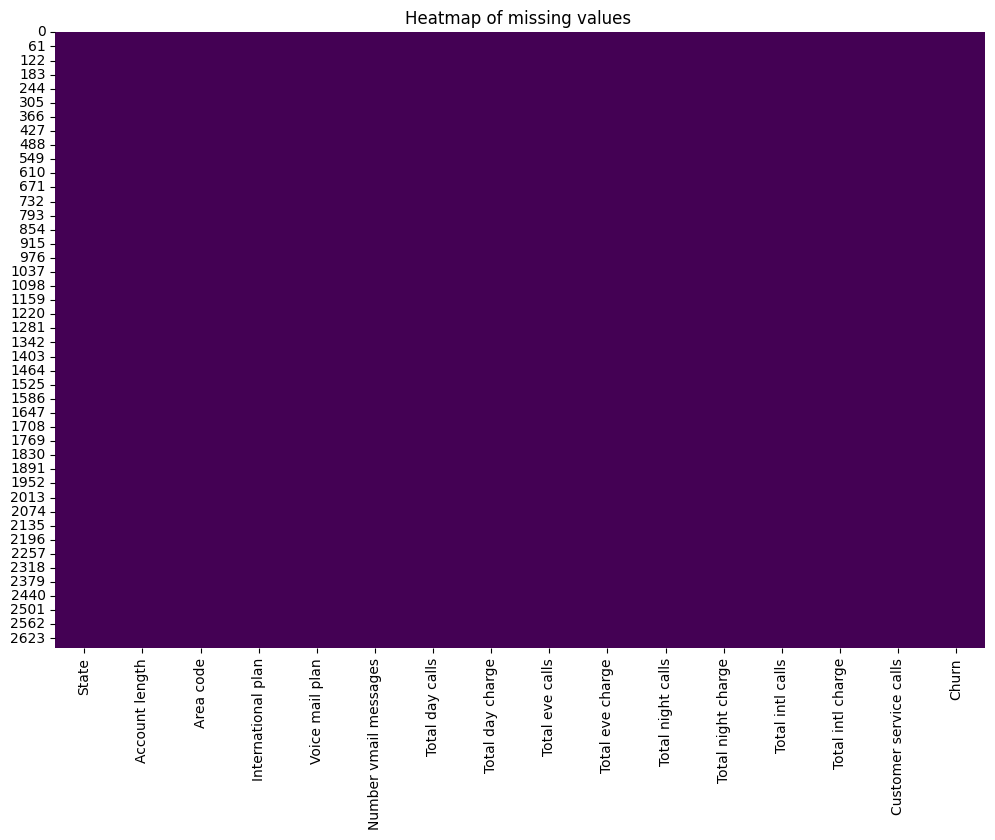

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(dff.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of missing values ')
plt.show()

In [ ]:
dff.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day calls,0
Total day charge,0
Total eve calls,0
Total eve charge,0


test dataset

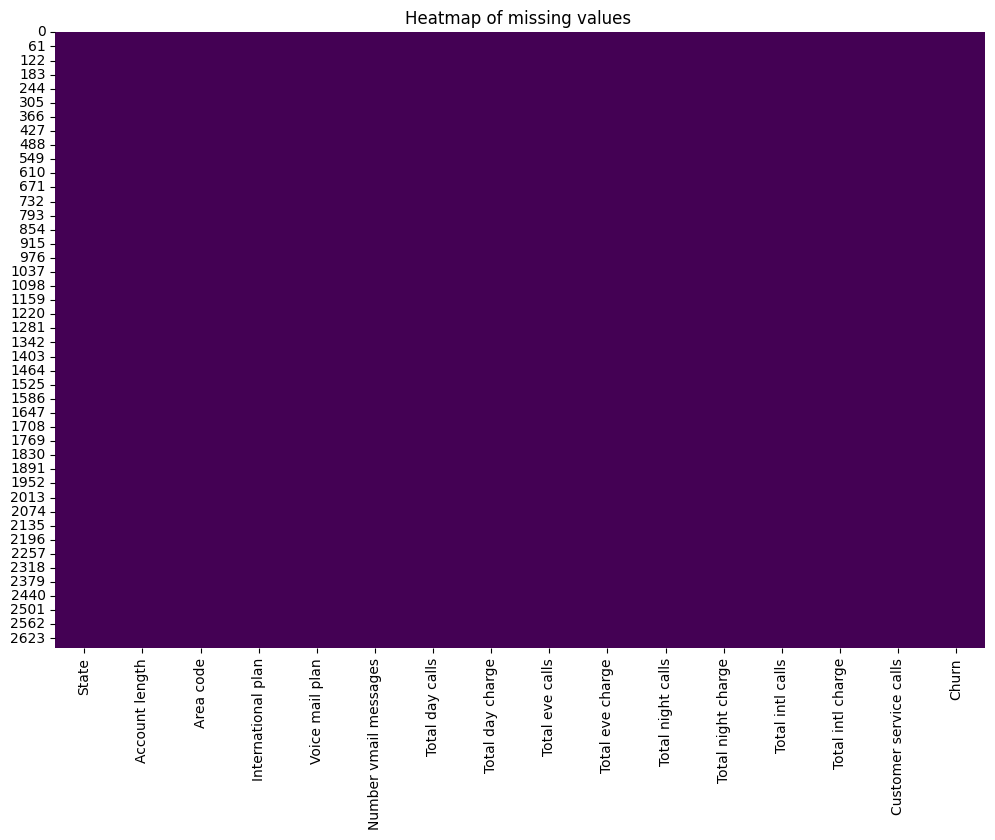

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(dff.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of missing values ')
plt.show()

In [ ]:
dff_test.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day calls,0
Total day charge,0
Total eve calls,0
Total eve charge,0


#Encodage for categorical columns

In [ ]:
df_oneHoteEncoder=dff.copy()
df_oneHoteEncoder_test=dff_test.copy()

df_LabelEncoder=dff.copy()
df_LabelEncoder_test=dff_test.copy()

Label encoder pour les modeles en arbres

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_before_Labelencoding = dff.copy()
# Encoder chaque colonne catégorielle avec Label Encoding
for col in categorical_cols:
    df_LabelEncoder[col] = label_encoder.fit_transform(df_LabelEncoder[col])


In [ ]:
dff.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,OH,107,415,No,Yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,NJ,137,415,No,No,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,OH,84,408,Yes,No,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,OK,75,415,Yes,No,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False


In [ ]:
df_LabelEncoder.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,35,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,31,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,35,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,36,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


In [ ]:
print(categorical_cols)

['State', 'International plan', 'Voice mail plan', 'Churn']


In [ ]:
import pandas as pd

# Initialiser les DataFrames de référence pour chaque variable encodée
df_after_Labelencoding = df_LabelEncoder.copy()

state_reference = pd.DataFrame({
    'State': df_before_Labelencoding['State'],
    'State_Code': df_after_Labelencoding['State']
}).drop_duplicates().reset_index(drop=True)

churn_code_reference = pd.DataFrame({
    'Churn': df_before_Labelencoding['Churn'],
    'Churn_Code': df_after_Labelencoding['Churn']
}).drop_duplicates().reset_index(drop=True)

international_plan_reference = pd.DataFrame({
    'International plan': df_before_Labelencoding['International plan'],
    'International plan_Code': df_after_Labelencoding['International plan']
}).drop_duplicates().reset_index(drop=True)

voice_mail_plan_reference = pd.DataFrame({
    'Voice mail plan': df_before_Labelencoding['Voice mail plan'],
    'Voice mail plan_Code': df_after_Labelencoding['Voice mail plan']
}).drop_duplicates().reset_index(drop=True)
print(churn_code_reference)
print(state_reference)
print(international_plan_reference)
print(voice_mail_plan_reference)
print("Les DataFrames de référence ont été créés et sauvegardés avec succès.")


   Churn  Churn_Code
0  False           0
1   True           1
   State  State_Code
0     KS          16
1     OH          35
2     NJ          31
3     OK          36
4     AL           1
5     MA          19
6     MO          24
7     WV          49
8     RI          39
9     IA          12
10    MT          26
11    ID          13
12    VT          46
13    VA          45
14    TX          43
15    FL           9
16    CO           5
17    AZ           3
18    NE          29
19    WY          50
20    IL          14
21    NH          30
22    LA          18
23    GA          10
24    AK           0
25    MD          20
26    AR           2
27    WI          48
28    OR          37
29    DE           8
30    IN          15
31    UT          44
32    CA           4
33    SD          41
34    NC          27
35    WA          47
36    MN          23
37    NM          32
38    NV          33
39    DC           7
40    NY          34
41    KY          17
42    ME          21
43    MS     

In [ ]:
import pandas as pd



# Créer des mappings pour les colonnes catégorielles
state_mapping = dict(zip(state_reference['State'], state_reference['State_Code']))
international_plan_mapping = dict(zip(international_plan_reference['International plan'], international_plan_reference['International plan_Code']))
voice_mail_plan_mapping = dict(zip(voice_mail_plan_reference['Voice mail plan'], voice_mail_plan_reference['Voice mail plan_Code']))
churn_mapping = dict(zip(churn_code_reference['Churn'], churn_code_reference['Churn_Code']))
# Remplacer les valeurs catégorielles dans dff_test par les codes correspondants
df_LabelEncoder_test['State'] = df_LabelEncoder_test['State'].map(state_mapping)
df_LabelEncoder_test['International plan'] = df_LabelEncoder_test['International plan'].map(international_plan_mapping)
df_LabelEncoder_test['Voice mail plan'] = df_LabelEncoder_test['Voice mail plan'].map(voice_mail_plan_mapping)
df_LabelEncoder_test['Churn'] = df_LabelEncoder_test['Churn'].map(churn_mapping)
# Vérifier les modifications
dff_test.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,97,31.37,80,29.89,90,9.71,4,2.35,1,False
1,IN,65,415,No,No,0,137,21.95,83,19.42,111,9.40,6,3.43,4,True
2,NY,161,415,No,No,0,67,56.59,97,27.01,128,7.23,9,1.46,4,True
3,SC,111,415,No,No,0,103,18.77,102,11.67,105,8.53,6,2.08,2,False
4,HI,49,510,No,No,0,117,20.28,109,18.28,90,8.04,1,3.00,1,False


In [ ]:
df_LabelEncoder_test.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,408,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35,1,0
1,15,65,415,0,0,0,137,21.95,83,19.42,111,9.40,6,3.43,4,1
2,34,161,415,0,0,0,67,56.59,97,27.01,128,7.23,9,1.46,4,1
3,40,111,415,0,0,0,103,18.77,102,11.67,105,8.53,6,2.08,2,0
4,11,49,510,0,0,0,117,20.28,109,18.28,90,8.04,1,3.00,1,0


one hote encoding pour les autres

In [ ]:
df_oneHoteEncoder=dff.copy()
df_oneHoteEncoder_test=dff_test.copy()
# Créer des mappings pour les colonnes catégorielles
international_plan_mapping = dict(zip(international_plan_reference['International plan'], international_plan_reference['International plan_Code']))
voice_mail_plan_mapping = dict(zip(voice_mail_plan_reference['Voice mail plan'], voice_mail_plan_reference['Voice mail plan_Code']))
churn_mapping = dict(zip(churn_code_reference['Churn'], churn_code_reference['Churn_Code']))
# Remplacer les valeurs catégorielles dans dff_test par les codes correspondants

df_oneHoteEncoder['International plan'] = df_oneHoteEncoder['International plan'].map(international_plan_mapping)
df_oneHoteEncoder['Voice mail plan'] = df_oneHoteEncoder['Voice mail plan'].map(voice_mail_plan_mapping)
df_oneHoteEncoder['Churn'] = df_oneHoteEncoder['Churn'].map(churn_mapping)

df_oneHoteEncoder_test['International plan'] = df_oneHoteEncoder_test['International plan'].map(international_plan_mapping)
df_oneHoteEncoder_test['Voice mail plan'] = df_oneHoteEncoder_test['Voice mail plan'].map(voice_mail_plan_mapping)
df_oneHoteEncoder_test['Churn'] = df_oneHoteEncoder_test['Churn'].map(churn_mapping)

df_oneHoteEncoder

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,0,0,0,98,22.90,68,16.12,128,9.96,5,3.19,2,0
2662,AZ,192,415,0,1,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0
2663,WV,68,415,0,0,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0
2664,RI,28,510,0,0,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0


In [ ]:
df_oneHoteEncoder_test

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35,1,0
1,IN,65,415,0,0,0,137,21.95,83,19.42,111,9.40,6,3.43,4,1
2,NY,161,415,0,0,0,67,56.59,97,27.01,128,7.23,9,1.46,4,1
3,SC,111,415,0,0,0,103,18.77,102,11.67,105,8.53,6,2.08,2,0
4,HI,49,510,0,0,0,117,20.28,109,18.28,90,8.04,1,3.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,0,1,26,88,23.31,125,13.23,94,11.14,7,3.11,2,0
663,AL,106,408,0,1,29,131,14.21,131,17.33,73,10.33,3,2.19,1,0
664,VT,60,415,0,0,0,118,32.96,110,7.23,134,9.45,8,3.56,3,0
665,WV,159,415,0,0,0,114,28.87,105,16.80,82,8.72,4,3.13,1,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Vérifiez les colonnes disponibles
print(df_oneHoteEncoder.columns)

# Colonne cible pour l'encodage
target_column = "State"

# Copier le DataFrame d'origine
df_before_OneHotEncoding = dff.copy()
onehot_encoder = OneHotEncoder(sparse_output=False, drop=None)

# Initialiser un DataFrame pour stocker le résultat final (colonnes non catégorielles)
df_OneHotEncoded = df_oneHoteEncoder.drop(columns=[target_column])  # Garder les colonnes autres que `State`

# Appliquer One-Hot Encoding à la colonne `State`
encoded_array = onehot_encoder.fit_transform(df_oneHoteEncoder[[target_column]])

# Récupérer les noms des nouvelles colonnes encodées
encoded_col_names = onehot_encoder.get_feature_names_out([target_column])

# Convertir les données encodées en DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_col_names)

# Ajouter les colonnes encodées au DataFrame final
df_OneHotEncoded = pd.concat([df_OneHotEncoded, encoded_df], axis=1)

# Créer un DataFrame de référence pour la colonne `State`
unique_values = df_before_OneHotEncoding[[target_column]].drop_duplicates().reset_index(drop=True)
reference_df = pd.DataFrame(encoded_array[:len(unique_values)], columns=encoded_col_names)
reference_df.insert(0, target_column, unique_values[target_column])

# Afficher le DataFrame encodé et la référence
print("DataFrame encodé avec One-Hot Encoding (uniquement pour `State`) :")
df_OneHotEncoded




Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day calls',
       'Total day charge', 'Total eve calls', 'Total eve charge',
       'Total night calls', 'Total night charge', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')
DataFrame encodé avec One-Hot Encoding (uniquement pour `State`) :


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,0,0,98,22.90,68,16.12,128,9.96,5,3.19,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2662,192,415,0,1,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2663,68,415,0,0,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2664,28,510,0,0,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
reference_df

,State,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,KS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,OH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,OK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,MA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,MO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,WV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,RI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,IA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_oneHoteEncoder_test

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35,1,0
1,IN,65,415,0,0,0,137,21.95,83,19.42,111,9.40,6,3.43,4,1
2,NY,161,415,0,0,0,67,56.59,97,27.01,128,7.23,9,1.46,4,1
3,SC,111,415,0,0,0,103,18.77,102,11.67,105,8.53,6,2.08,2,0
4,HI,49,510,0,0,0,117,20.28,109,18.28,90,8.04,1,3.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,0,1,26,88,23.31,125,13.23,94,11.14,7,3.11,2,0
663,AL,106,408,0,1,29,131,14.21,131,17.33,73,10.33,3,2.19,1,0
664,VT,60,415,0,0,0,118,32.96,110,7.23,134,9.45,8,3.56,3,0
665,WV,159,415,0,0,0,114,28.87,105,16.80,82,8.72,4,3.13,1,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)  # sparse_output=False for dense array

# Fit and transform the 'State' column
state_encoded = encoder.fit_transform(df_oneHoteEncoder_test[['State']])

# Get the names of the encoded columns
state_encoded_columns = encoder.get_feature_names_out(['State'])

# Create a DataFrame with the encoded columns
state_encoded_df = pd.DataFrame(state_encoded, columns=state_encoded_columns, index=df_oneHoteEncoder_test.index)

# Concatenate the encoded columns to the original DataFrame (keeping the original columns intact)
df_oneHoteEncoder_test = pd.concat([df_oneHoteEncoder_test, state_encoded_df], axis=1)

# Drop the original 'State' column
df_oneHoteEncoder_test.drop('State', axis=1, inplace=True)

# Now, reorder the new columns according to the order in reference_df.columns[1:]
# Ensure that we only reorder the newly created columns (the ones added by one-hot encoding)
new_columns = state_encoded_columns.tolist()

# Create a list of the original columns (without 'State') and the new columns
original_columns = [col for col in df_oneHoteEncoder_test.columns if col not in new_columns]
final_column_order = original_columns + new_columns

# Reorder the columns in df_oneHoteEncoder_test
df_oneHoteEncoder_test = df_oneHoteEncoder_test[final_column_order]

# Display the final DataFrame
df_oneHoteEncoder_test


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,117,408,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,65,415,0,0,0,137,21.95,83,19.42,111,9.40,6,3.43,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,161,415,0,0,0,67,56.59,97,27.01,128,7.23,9,1.46,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,111,415,0,0,0,103,18.77,102,11.67,105,8.53,6,2.08,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,510,0,0,0,117,20.28,109,18.28,90,8.04,1,3.00,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,415,0,1,26,88,23.31,125,13.23,94,11.14,7,3.11,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
663,106,408,0,1,29,131,14.21,131,17.33,73,10.33,3,2.19,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,60,415,0,0,0,118,32.96,110,7.23,134,9.45,8,3.56,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
665,159,415,0,0,0,114,28.87,105,16.80,82,8.72,4,3.13,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_oneHoteEncoder_test

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,117,408,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,65,415,0,0,0,137,21.95,83,19.42,111,9.40,6,3.43,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,161,415,0,0,0,67,56.59,97,27.01,128,7.23,9,1.46,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,111,415,0,0,0,103,18.77,102,11.67,105,8.53,6,2.08,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,510,0,0,0,117,20.28,109,18.28,90,8.04,1,3.00,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,415,0,1,26,88,23.31,125,13.23,94,11.14,7,3.11,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
663,106,408,0,1,29,131,14.21,131,17.33,73,10.33,3,2.19,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,60,415,0,0,0,118,32.96,110,7.23,134,9.45,8,3.56,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
665,159,415,0,0,0,114,28.87,105,16.80,82,8.72,4,3.13,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#oneHote encoding for State
df_oneHoteEncoder_test
df_OneHotEncoded
#Label encoder
df_LabelEncoder_test
df_LabelEncoder

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,35,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,31,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,35,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,36,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,40,79,415,0,0,0,98,22.90,68,16.12,128,9.96,5,3.19,2,0
2662,3,192,415,0,1,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0
2663,49,68,415,0,0,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0
2664,39,28,510,0,0,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0


#Standarisation

pour la data code avec OneHote encoder

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib
# Appliquer la mise à l'échelle Min-Max
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_OneHotEncoded[numerical_cols])
joblib.dump(scaler, 'minmax_scaler.pkl')
X_scaled_test = scaler.transform(df_oneHoteEncoder_test[numerical_cols])



In [ ]:
df_OneHotEncoded[numerical_cols]=X_scaled

df_oneHoteEncoder_test[numerical_cols]=X_scaled_test

In [ ]:
df_OneHotEncoded.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,0.524793,0.068627,0,1,0.50,0.68750,0.755701,0.582353,0.542866,0.436090,0.572152,0.15,0.500000,0.111111,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.438017,0.068627,0,1,0.52,0.76875,0.460597,0.605882,0.537690,0.526316,0.600000,0.15,0.685185,0.111111,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.561983,0.068627,0,0,0.00,0.71250,0.693830,0.647059,0.333225,0.533835,0.338608,0.25,0.609259,0.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.342975,0.000000,1,0,0.00,0.44375,0.853454,0.517647,0.170171,0.421053,0.436076,0.35,0.329630,0.222222,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.305785,0.068627,1,0,0.00,0.70625,0.475184,0.717647,0.407959,0.661654,0.407595,0.15,0.505556,0.333333,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_oneHoteEncoder_test.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,0.479339,0.000000,0,0,0.0,0.60625,0.525989,0.470588,0.967001,0.428571,0.489873,0.20,0.435185,0.111111,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.264463,0.068627,0,0,0.0,0.85625,0.368042,0.488235,0.628276,0.586466,0.470253,0.30,0.635185,0.444444,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.661157,0.068627,0,0,0.0,0.41875,0.948860,0.570588,0.873827,0.714286,0.332911,0.45,0.270370,0.444444,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.454545,0.068627,0,0,0.0,0.64375,0.314722,0.600000,0.377548,0.541353,0.415190,0.30,0.385185,0.222222,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.198347,1.000000,0,0,0.0,0.73125,0.340040,0.641176,0.591394,0.428571,0.384177,0.05,0.555556,0.111111,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


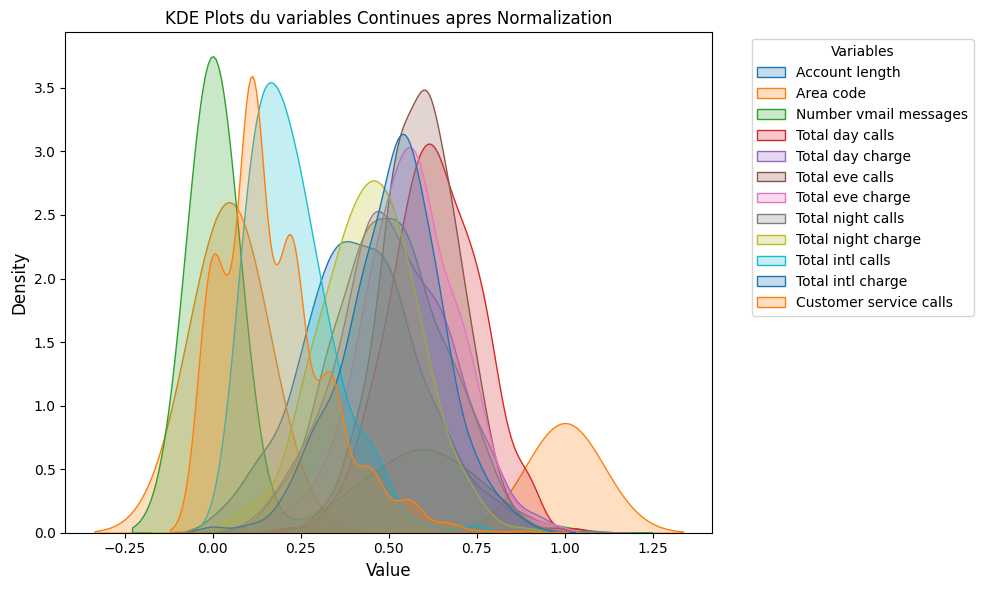

In [ ]:
# Increase figure size for better visibility
plt.figure(figsize=(10, 6))


# Loop through continuous variables to plot their KDEs
for var in numerical_cols:
    sns.kdeplot(df_oneHoteEncoder_test[var], fill=True, label=var, linewidth=1)

# Title and legend
plt.title('KDE Plots du variables Continues apres Normalization', fontsize=12)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_loaded = joblib.load('minmax_scaler.pkl')
scaler = MinMaxScaler()
X_scaled =scaler_loaded.fit_transform(df_LabelEncoder[numerical_cols])
X_scaled_test = scaler_loaded.fit_transform(df_LabelEncoder_test[numerical_cols])
df_LabelEncoder[numerical_cols]=X_scaled
df_LabelEncoder_test[numerical_cols]=X_scaled_test

In [ ]:
df_LabelEncoder.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,0.524793,0.068627,0,1,0.50,0.68750,0.755701,0.582353,0.542866,0.436090,0.572152,0.15,0.500000,0.111111,0
1,35,0.438017,0.068627,0,1,0.52,0.76875,0.460597,0.605882,0.537690,0.526316,0.600000,0.15,0.685185,0.111111,0
2,31,0.561983,0.068627,0,0,0.00,0.71250,0.693830,0.647059,0.333225,0.533835,0.338608,0.25,0.609259,0.000000,0
3,35,0.342975,0.000000,1,0,0.00,0.44375,0.853454,0.517647,0.170171,0.421053,0.436076,0.35,0.329630,0.222222,0
4,36,0.305785,0.068627,1,0,0.00,0.70625,0.475184,0.717647,0.407959,0.661654,0.407595,0.15,0.505556,0.333333,0


In [ ]:
df_LabelEncoder_test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,0.502165,0.000000,0,0,0.0,0.496296,0.514400,0.328244,0.967742,0.360902,0.558994,0.222222,0.475709,0.125,0
1,15,0.277056,0.068627,0,0,0.0,0.792593,0.334732,0.351145,0.575019,0.518797,0.539007,0.333333,0.694332,0.500,1
2,34,0.692641,0.068627,0,0,0.0,0.274074,0.995422,0.458015,0.859715,0.646617,0.399097,0.500000,0.295547,0.500,1
3,40,0.476190,0.068627,0,0,0.0,0.540741,0.274080,0.496183,0.284321,0.473684,0.482914,0.333333,0.421053,0.250,0
4,11,0.207792,1.000000,0,0,0.0,0.644444,0.302880,0.549618,0.532258,0.360902,0.451322,0.055556,0.607287,0.125,0


Data split

In [ ]:
X_train_arbre=df_LabelEncoder.drop('Churn', axis=1)
y_train_arbre=df_LabelEncoder['Churn']
X_test_arbre=df_LabelEncoder_test.drop('Churn', axis=1)
y_test_arbre=df_LabelEncoder_test['Churn']

In [ ]:
X_train_lin=df_OneHotEncoded.drop('Churn', axis=1)
y_train_lin=df_OneHotEncoded['Churn']
X_test_lin=df_oneHoteEncoder_test.drop('Churn', axis=1)
y_test_lin=df_oneHoteEncoder_test['Churn']

Dessecion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 15),

}

In [ ]:

model = DecisionTreeClassifier()

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train_arbre, y_train_arbre)


best_params = grid.best_params_
print("Meilleurs paramètres :", best_params)

Meilleurs paramètres : {'criterion': 'entropy', 'max_depth': 6}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



In [ ]:
Final_model=DecisionTreeClassifier(**best_params)
Final_model.fit(X_train_arbre, y_train_arbre)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [ ]:
train_score = Final_model.score(X_train_arbre, y_train_arbre)
test_score = Final_model.score(X_test_arbre, y_test_arbre)
print("Train score =", train_score)
print("Test score =", test_score)

Train score = 0.9576144036009002
Test score = 0.9295352323838081


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred = Final_model.predict(X_test_arbre)
# Afficher le rapport de classification (precision, recall, F1-score)
print("Classification Report:")
print(classification_report(y_test_arbre, y_pred, target_names=['Non Churn', 'Churn']))

Classification Report:
              precision    recall  f1-score   support

   Non Churn       0.95      0.97      0.96       572
       Churn       0.79      0.68      0.73        95

    accuracy                           0.93       667
   macro avg       0.87      0.83      0.85       667
weighted avg       0.93      0.93      0.93       667



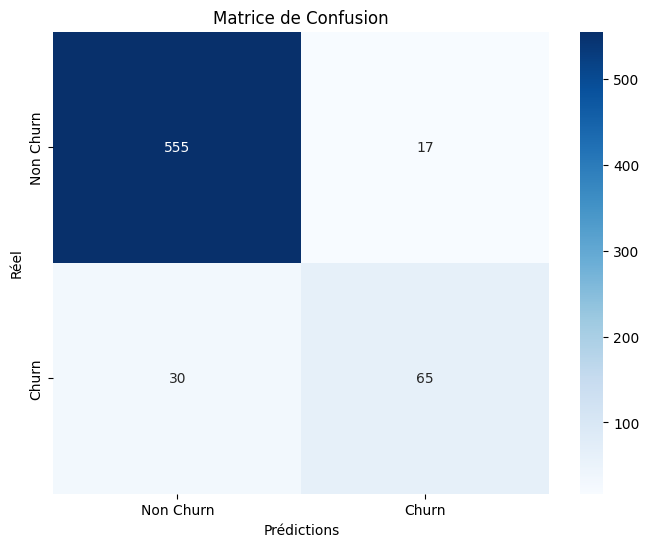

In [ ]:
# Afficher la matrice de confusion
cm = confusion_matrix(y_test_arbre, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Churn', 'Churn'], yticklabels=['Non Churn', 'Churn'])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_text, plot_tree

In [ ]:
# Définir les hyperparamètres à optimiser pour Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],       # Nombre d'arbres dans la forêt
    'max_depth': range(1, 15),           # Profondeur maximale
    'criterion': ['gini', 'entropy'],    # Critères d'impureté
}

In [ ]:
# Modèle Random Forest
model = RandomForestClassifier(random_state=42)

# Recherche de grille pour l'optimisation des hyperparamètres
grid = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train_arbre, y_train_arbre)

# Meilleurs hyperparamètres
best_params = grid.best_params_
print("Meilleurs paramètres :", best_params)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Meilleurs paramètres : {'criterion': 'entropy', 'max_depth': 14, 'n_estimators': 100}


In [ ]:
# Modèle final avec les meilleurs hyperparamètres
Final_model = RandomForestClassifier(**best_params, random_state=42)
Final_model.fit(X_train_arbre, y_train_arbre)

RandomForestClassifier(criterion='entropy', max_depth=14, random_state=42)

In [ ]:
# Scores d'entraînement et de test
train_score = Final_model.score(X_train_arbre, y_train_arbre)
test_score = Final_model.score(X_test_arbre, y_test_arbre)
print("Train score =", train_score)
print("Test score =", test_score)

Train score = 0.9883720930232558
Test score = 0.9355322338830585


In [ ]:

# Prédictions et rapport de classification
y_pred = Final_model.predict(X_test_arbre)
print("Classification Report:")
print(classification_report(y_test_arbre, y_pred, target_names=['Non Churn', 'Churn']))

Classification Report:
              precision    recall  f1-score   support

   Non Churn       0.95      0.98      0.96       572
       Churn       0.85      0.66      0.75        95

    accuracy                           0.94       667
   macro avg       0.90      0.82      0.85       667
weighted avg       0.93      0.94      0.93       667



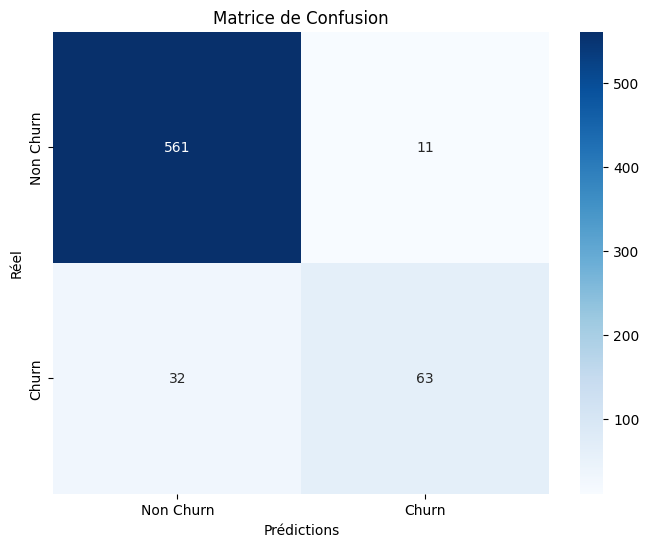

In [ ]:
# Matrice de confusion
cm = confusion_matrix(y_test_arbre, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Churn', 'Churn'], yticklabels=['Non Churn', 'Churn'])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()

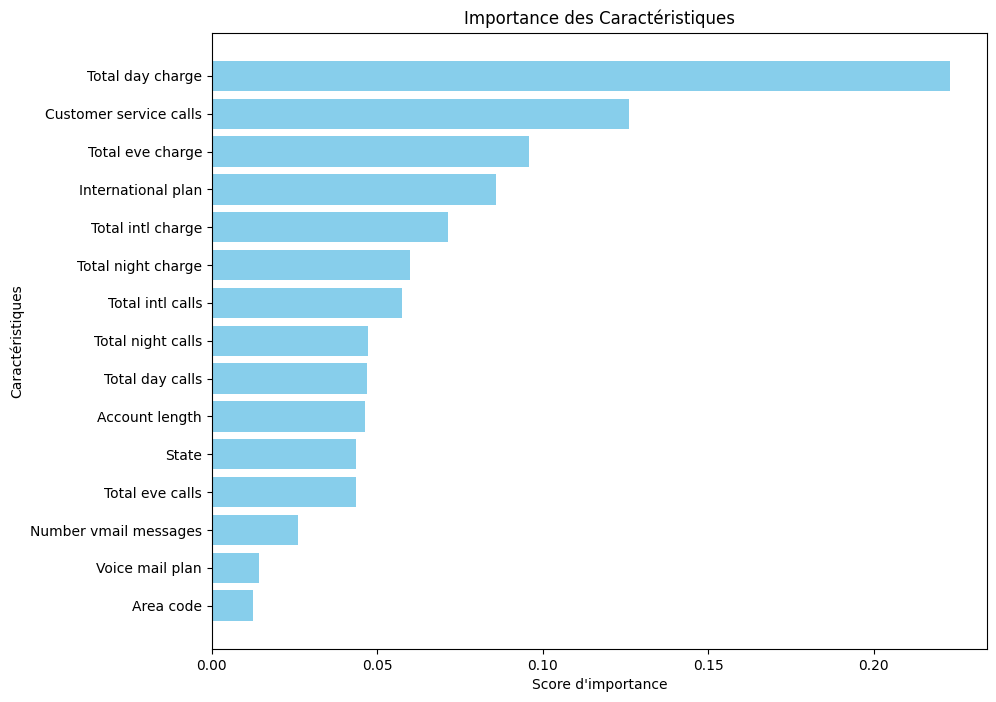

In [ ]:
# Importance des caractéristiques
importances = Final_model.feature_importances_
features = X_train_arbre.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(features[sorted_idx], importances[sorted_idx], color='skyblue')
plt.title("Importance des Caractéristiques")
plt.xlabel("Score d'importance")
plt.ylabel("Caractéristiques")
plt.show()

#Other Modeles

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
X_train_lin

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,0.524793,0.068627,0,1,0.50,0.68750,0.755701,0.582353,0.542866,0.436090,0.572152,0.15,0.500000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.438017,0.068627,0,1,0.52,0.76875,0.460597,0.605882,0.537690,0.526316,0.600000,0.15,0.685185,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.561983,0.068627,0,0,0.00,0.71250,0.693830,0.647059,0.333225,0.533835,0.338608,0.25,0.609259,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.342975,0.000000,1,0,0.00,0.44375,0.853454,0.517647,0.170171,0.421053,0.436076,0.35,0.329630,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.305785,0.068627,1,0,0.00,0.70625,0.475184,0.717647,0.407959,0.661654,0.407595,0.15,0.505556,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,0.322314,0.068627,0,0,0.00,0.61250,0.383970,0.400000,0.521514,0.714286,0.505696,0.25,0.590741,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2662,0.789256,0.068627,0,1,0.72,0.48125,0.445171,0.741176,0.592688,0.375940,0.670253,0.30,0.494444,0.222222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2663,0.276860,0.068627,0,0,0.00,0.35625,0.658786,0.323529,0.421870,0.676692,0.420253,0.20,0.479630,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2664,0.111570,1.000000,0,0,0.00,0.68125,0.515426,0.341176,0.794241,0.436090,0.422152,0.30,0.705556,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

# Définir les hyperparamètres à tester
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialisation du modèle KNN
knn = KNeighborsClassifier()

# GridSearchCV pour optimiser les hyperparamètres
grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,                # Validation croisée à 5 plis
    scoring='accuracy',  # Utiliser la précision comme métrique
    n_jobs=-1,           # Utiliser tous les cœurs pour accélérer
    verbose=1            # Afficher la progression
)

# Ajustement du modèle sur les données d'entraînement
grid_search_knn.fit(X_train_lin, y_train_lin)

# Meilleurs hyperparamètres
print("Meilleurs paramètres:", grid_search_knn.best_params_)

# Meilleur modèle avec les hyperparamètres optimaux
best_knn_model = grid_search_knn.best_estimator_
print("Meilleur modèle :", best_knn_model)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs paramètres: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Meilleur modèle : KNeighborsClassifier(metric='euclidean', n_neighbors=9)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



In [ ]:
# Entraîner le modèle
best_knn_model.fit(X_train_lin, y_train_lin)
# Prédire sur le jeu de test
y_pred_knn = best_knn_model.predict(X_test_lin)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Calcul du score (Accuracy)
score_knn = accuracy_score(y_test_lin, y_pred_knn)
print("Accuracy Score (kNN) :", score_knn)

# Calcul de la matrice de confusion
conf_matrix_knn = confusion_matrix(y_test_lin, y_pred_knn)
print("Matrice de Confusion (kNN) :\n", conf_matrix_knn)

# Rapport de classification
class_report_knn = classification_report(y_test_lin, y_pred_knn)
print("Rapport de Classification (kNN) :\n", class_report_knn)

Accuracy Score (kNN) : 0.856071964017991
Matrice de Confusion (kNN) :
 [[571   1]
 [ 95   0]]
Rapport de Classification (kNN) :
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       572
           1       0.00      0.00      0.00        95

    accuracy                           0.86       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.74      0.86      0.79       667



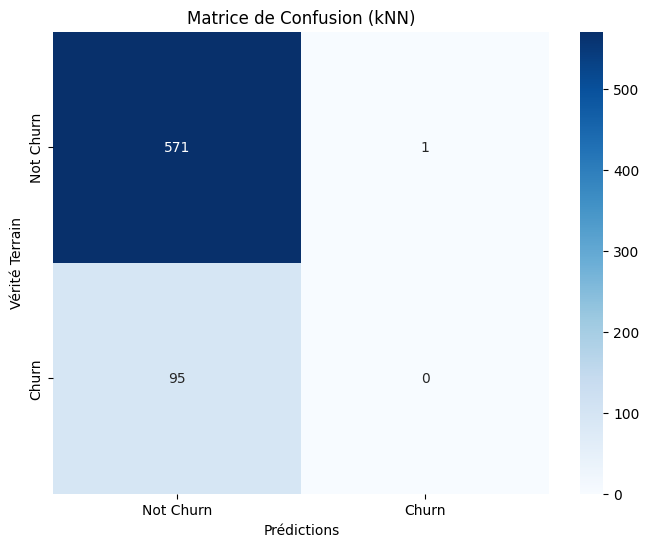

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Prédictions')
plt.ylabel('Vérité Terrain')
plt.title('Matrice de Confusion (kNN)')
plt.show()

Logestic regression

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir la grille d'hyperparamètres
param_grid = {
    'C': [0.1, 1, 10, 100],       # Régularisation
    'penalty': ['l1', 'l2'],      # Type de pénalité
    'solver': ['liblinear', 'saga']  # Solveurs compatibles
}


In [ ]:
# Initialiser GridSearchCV
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',  # Mesure à optimiser
    cv=5,                # Nombre de folds pour la validation croisée
    verbose=1,           # Afficher les détails
    n_jobs=-1            # Utiliser tous les cœurs disponibles
)

# Effectuer la recherche
grid_search.fit(X_train_lin, y_train_lin)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [ ]:
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleure précision (Accuracy) :", grid_search.best_score_)


Meilleurs hyperparamètres : {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Meilleure précision (Accuracy) : 0.8657194454399167


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Prédire les valeurs pour le jeu de test
y_pred = best_model.predict(X_test_lin)

# Calcul du score (Accuracy)
score = accuracy_score(y_test_lin, y_pred)
print("Accuracy Score :", score)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test_lin, y_pred)
print("Matrice de confusion :\n", conf_matrix)

# Rapport de classification
class_report = classification_report(y_test_lin, y_pred)
print("Rapport de classification :\n", class_report)

Accuracy Score : 0.8530734632683659
Matrice de confusion :
 [[553  19]
 [ 79  16]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       572
           1       0.46      0.17      0.25        95

    accuracy                           0.85       667
   macro avg       0.67      0.57      0.58       667
weighted avg       0.82      0.85      0.82       667



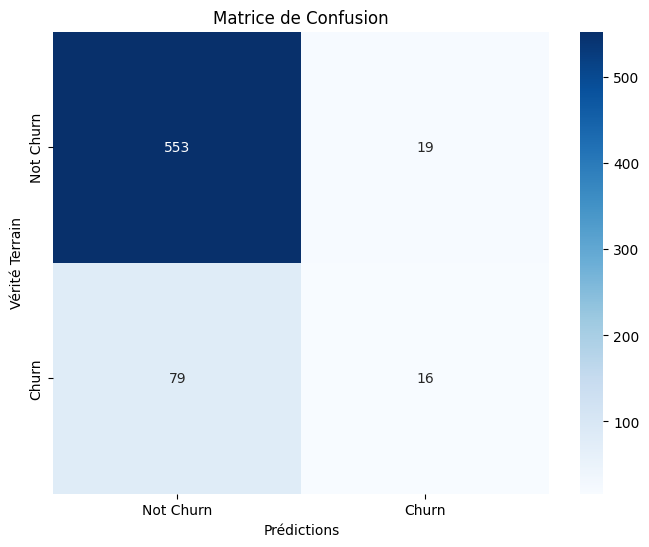

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Afficher la matrice de confusion avec une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Prédictions')
plt.ylabel('Vérité Terrain')
plt.title('Matrice de Confusion')
plt.show()

SVM

In [ ]:
from sklearn.svm import SVC

# Initialiser et entraîner le modèle
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_lin, y_train_lin)

# Évaluation
y_pred_svm = svm_model.predict(X_test_lin)
print(classification_report(y_test_lin, y_pred_svm))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       572
           1       0.71      0.05      0.10        95

    accuracy                           0.86       667
   macro avg       0.79      0.52      0.51       667
weighted avg       0.84      0.86      0.81       667

